<b>1. Data Understanding & Exploration: [5 Marks]

A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

D. Print 5 point summary of the numerical features and share insights. [1 Marks]</b>

In [60]:
#importing all the required packages:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans 

In [61]:
#reading csv file:
Data1=pd.read_csv('Car name.csv')

In [62]:
#reading json file:
Data2=pd.read_json("Car-Attributes.json")

In [63]:
#merging the 2 dataframes:
car=pd.concat([Data1,Data2],axis=1)

In [64]:
#to keet the original data as it is:
cardata=car

In [65]:
#Quick read of the dataframe:
def datacheck(dataframe):
    print(dataframe.head(5))
    print(dataframe.shape)
    print(dataframe.dtypes)
    print(dataframe.columns)
    missing_values=dataframe.isna().sum()
    print(missing_values)
datacheck(cardata)

                    car_name   mpg  cyl   disp   hp    wt   acc  yr  origin
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1
(398, 9)
car_name     object
mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
dtype: object
Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')
car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64


In [66]:
cardata.describe().T

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

<b>2. Data Preparation & Analysis: [10 Marks]
    
A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

C. Plot a pairplot for all features. [1 Marks]

D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

E. Share insights for Q2.d. [1 Marks]

F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

G. Share insights for Q2.f. [1 Marks]

H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]</b>

In [67]:
# Check for missing value
cardata.isna().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [68]:
cardata[cardata.duplicated()].shape[0]

0

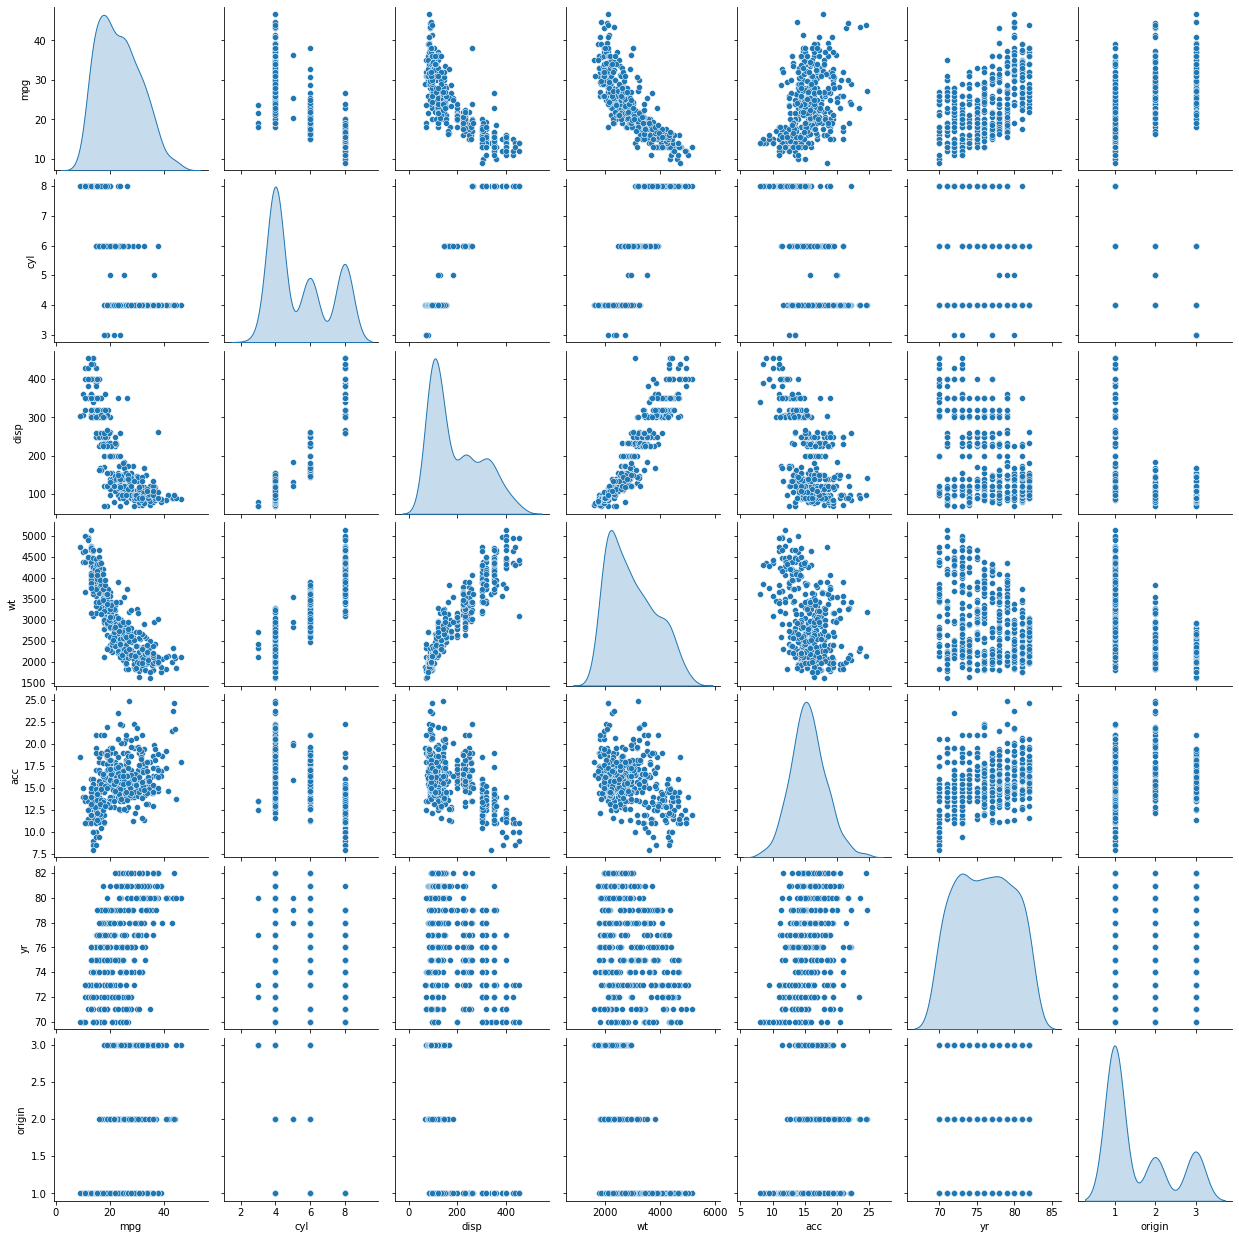

In [69]:
sns.pairplot(cardata,diag_kind='kde')

<b>Insight on above pair plot:

From diagonal plots we can see origin has 3 points (evident from data)

yr - shows two peaks majorily

acc,mpg are nearly normal

cyl and disp shows 3 clusters while wt shows 2

from bivariate plots we can see that mps shows negative liner relationship with wt,hp and disp 
(correlation too gives high negative correlation)

Cyl too shows negative correlation with levels</b>

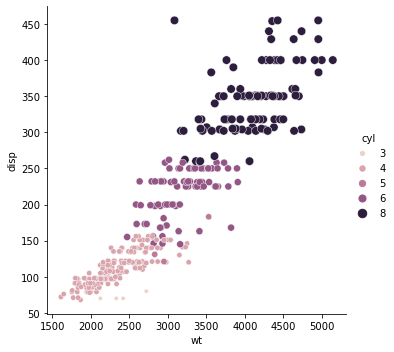

In [70]:
# Create scatter plot of weight(wt) vs. displacement(disp)
sns.relplot(x="wt", y="disp", 
            data=cardata, kind="scatter", 
            size="cyl",
            hue='cyl');

<b>insight  for above scatterplot:

The higher the weight(wt) is the higher the displacement(disp)
    
Both weight(wt) and displacement(disp) is linearly correlated.

They also tend to have a higher number of cylinders.
<b>



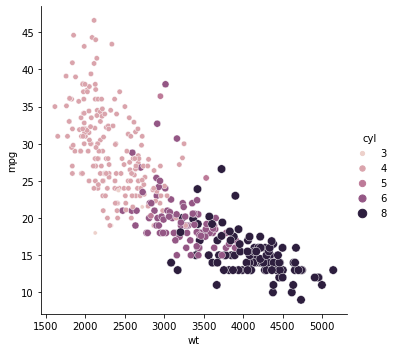

In [71]:
# Create scatter plot of weight(wt) vs. displacement(disp)
sns.relplot(x="wt", y="mpg", 
            data=cardata, kind="scatter", 
            size="cyl",
            hue='cyl');

<b>Insight for above scatterplot weight(wt) and miles per gallon(mpg) 

cars with higher weight(wt) tend to get lower miles per gallon(mpg).

cars with lower weight(wt) tends to get higher miles per gallon(mpg).

They also tend to have a higher number of cylinders.
    </b>

In [72]:
#to know the unique 
car["hp"].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

In [73]:
car["hp"] = car["hp"].replace('?','NaN').astype(float)
car["hp"].fillna(value=car["hp"].mean(),inplace=True)
car["hp"].unique()
car["hp"] = car["hp"].astype(int)

In [74]:
#printing 5 point summary

car.describe().T

count         mean         std     min       25%     50%       75%  \
mpg     398.0    23.514573    7.815984     9.0    17.500    23.0    29.000   
cyl     398.0     5.454774    1.701004     3.0     4.000     4.0     8.000   
disp    398.0   193.425879  104.269838    68.0   104.250   148.5   262.000   
hp      398.0   104.462312   38.199230    46.0    76.000    95.0   125.000   
wt      398.0  2970.424623  846.841774  1613.0  2223.750  2803.5  3608.000   
acc     398.0    15.568090    2.757689     8.0    13.825    15.5    17.175   
yr      398.0    76.010050    3.697627    70.0    73.000    76.0    79.000   
origin  398.0     1.572864    0.802055     1.0     1.000     1.0     2.000   

           max  
mpg       46.6  
cyl        8.0  
disp     455.0  
hp       230.0  
wt      5140.0  
acc       24.8  
yr        82.0  
origin     3.0

In [75]:
cardata.groupby(cardata['cyl']).mean()

mpg        disp          hp           wt        acc         yr  \
cyl                                                                         
3    20.550000   72.500000   99.250000  2398.500000  13.250000  75.500000   
4    29.286765  109.796569   78.911765  2308.127451  16.601471  77.073529   
5    27.366667  145.000000   82.333333  3103.333333  18.633333  79.000000   
6    19.985714  218.142857  101.535714  3198.226190  16.263095  75.928571   
8    14.963107  345.009709  158.300971  4114.718447  12.955340  73.902913   

       origin  
cyl            
3    3.000000  
4    1.985294  
5    2.000000  
6    1.190476  
8    1.000000

Further dig into data shows max mpg is for 4 cylinders vehicles

Origin as pointed earlier indicates production point so should be broken into dummy variables

Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
subtract year from 83 to get the age

Other continuous variables should be checked for outliers and should be normlized using z-score

In [76]:
# Calculate age of vehicle
cardata['age'] = 83-cardata['yr']
cardata.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1   

   age  
0   13  
1   13  
2   13  
3   13  
4   13

In [77]:
#Convert origing into dummy variables (This again is subjected to business knowledge. We might drop this variable as well
# Inclusion is more to demonstrate on how to use categorical data)

one_hot = pd.get_dummies(cardata['origin'])
one_hot = one_hot.add_prefix('origin_')

# merge in main data frame
cardata = cardata.join(one_hot)
cardata.head()

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1   

   age  origin_1  origin_2  origin_3  
0   13         1         0         0  
1   13         1         0         0  
2   13         1         0         0  
3   13         1         0         0  
4   13         1         0         0

In [78]:
# Let us now remove duplicate/irrelevant columns

cars_new = cardata.drop(['yr','origin','car_name'], axis =1)

cars_new.head()

mpg  cyl   disp   hp    wt   acc  age  origin_1  origin_2  origin_3
0  18.0    8  307.0  130  3504  12.0   13         1         0         0
1  15.0    8  350.0  165  3693  11.5   13         1         0         0
2  18.0    8  318.0  150  3436  11.0   13         1         0         0
3  16.0    8  304.0  150  3433  12.0   13         1         0         0
4  17.0    8  302.0  140  3449  10.5   13         1         0         0

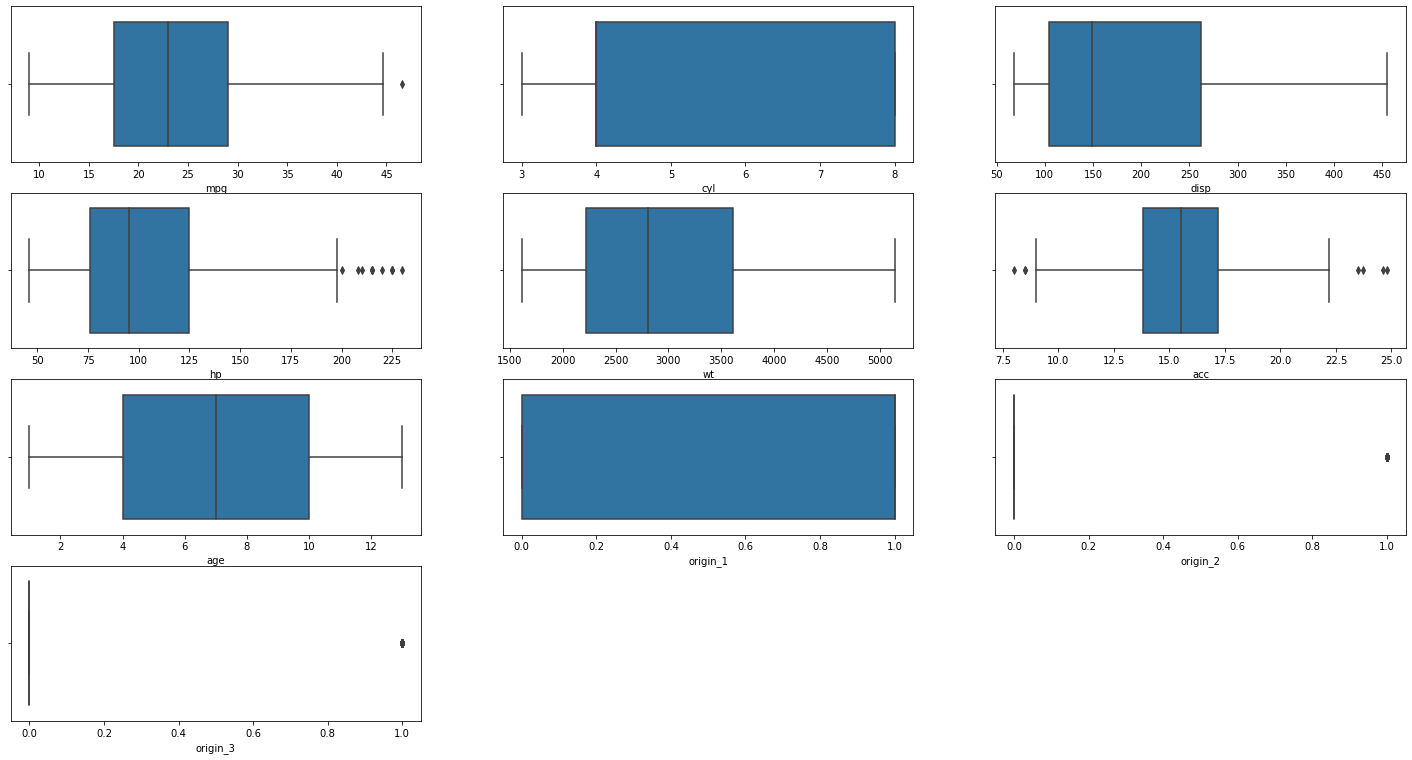

In [79]:
plt.figure(figsize=(25, 20))
col = 1
for i in cars_new:
    plt.subplot(6, 3, col)
    sns.boxplot(cars_new[i])
    col += 1 

In [80]:
# Let us take logaritmic transform for hp,mpg and acc 
# To remove outliers
cars_new['hp'] = np.log(cars_new['hp'])
cars_new['acc'] = np.log(cars_new['acc'])
cars_new['mpg'] = np.log(cars_new['mpg'])

cars_new.head()

mpg  cyl   disp        hp    wt       acc  age  origin_1  origin_2  \
0  2.890372    8  307.0  4.867534  3504  2.484907   13         1         0   
1  2.708050    8  350.0  5.105945  3693  2.442347   13         1         0   
2  2.890372    8  318.0  5.010635  3436  2.397895   13         1         0   
3  2.772589    8  304.0  5.010635  3433  2.484907   13         1         0   
4  2.833213    8  302.0  4.941642  3449  2.351375   13         1         0   

   origin_3  
0         0  
1         0  
2         0  
3         0  
4         0

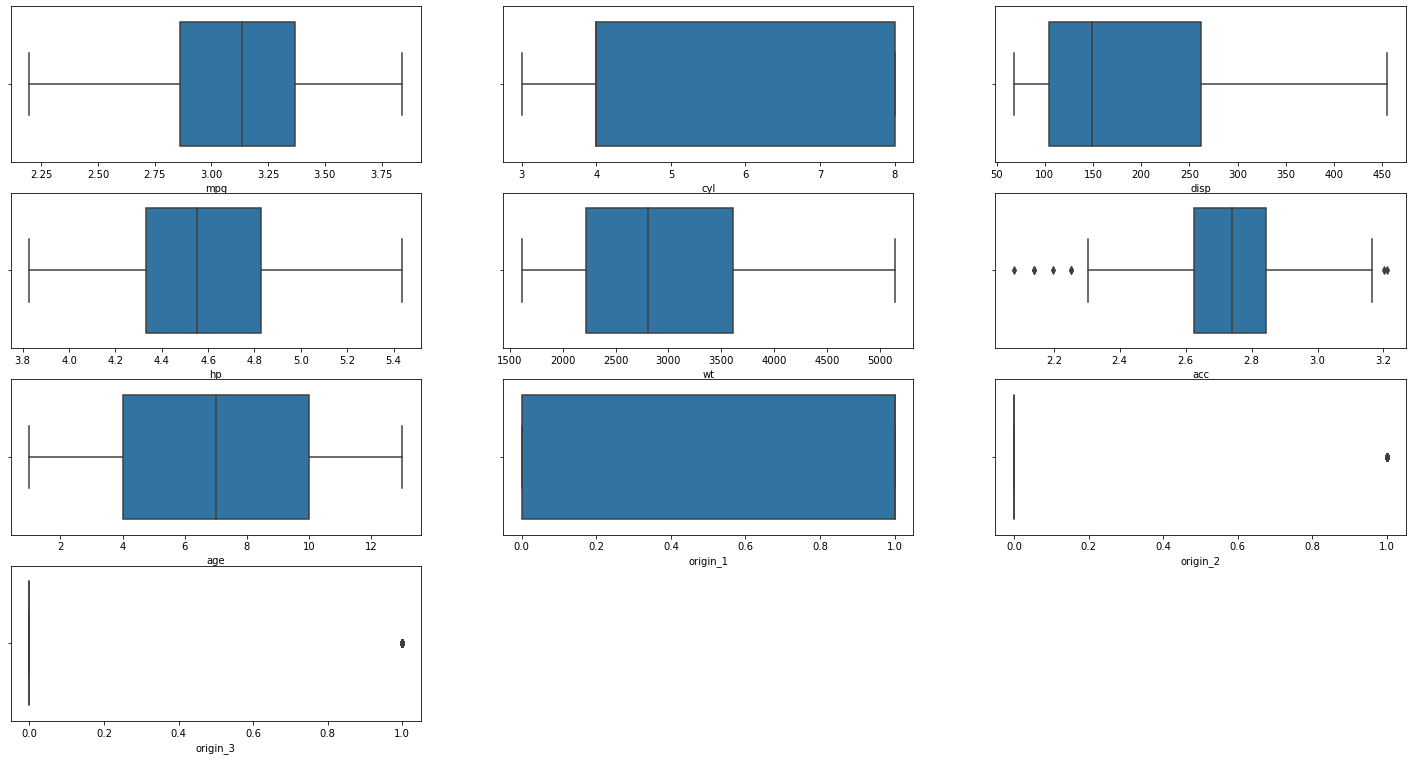

In [81]:
plt.figure(figsize=(25, 20))
col = 1
for i in cars_new:
    plt.subplot(6, 3, col)
    sns.boxplot(cars_new[i])
    col += 1 

In [82]:
# This looks better.
# Now let us try to scale the variables

#Apply z score for only the numeric variables

from scipy.stats import zscore

cars_new.dtypes
numeric_cols = cars_new.select_dtypes(include=[np.int64, np.float64]).columns
numeric_cols
cars_new[numeric_cols] =cars_new[numeric_cols].apply(zscore)

In [83]:
cars_new.head()

mpg       cyl      disp        hp        wt       acc       age  \
0 -0.622035  1.498191  1.090604  0.818858  0.630870 -1.353748  1.627426   
1 -1.159493  1.498191  1.503514  1.519212  0.854333 -1.589535  1.627426   
2 -0.622035  1.498191  1.196232  1.239230  0.550470 -1.835805  1.627426   
3 -0.969242  1.498191  1.061796  1.239230  0.546923 -1.353748  1.627426   
4 -0.790530  1.498191  1.042591  1.036557  0.565841 -2.093533  1.627426   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0

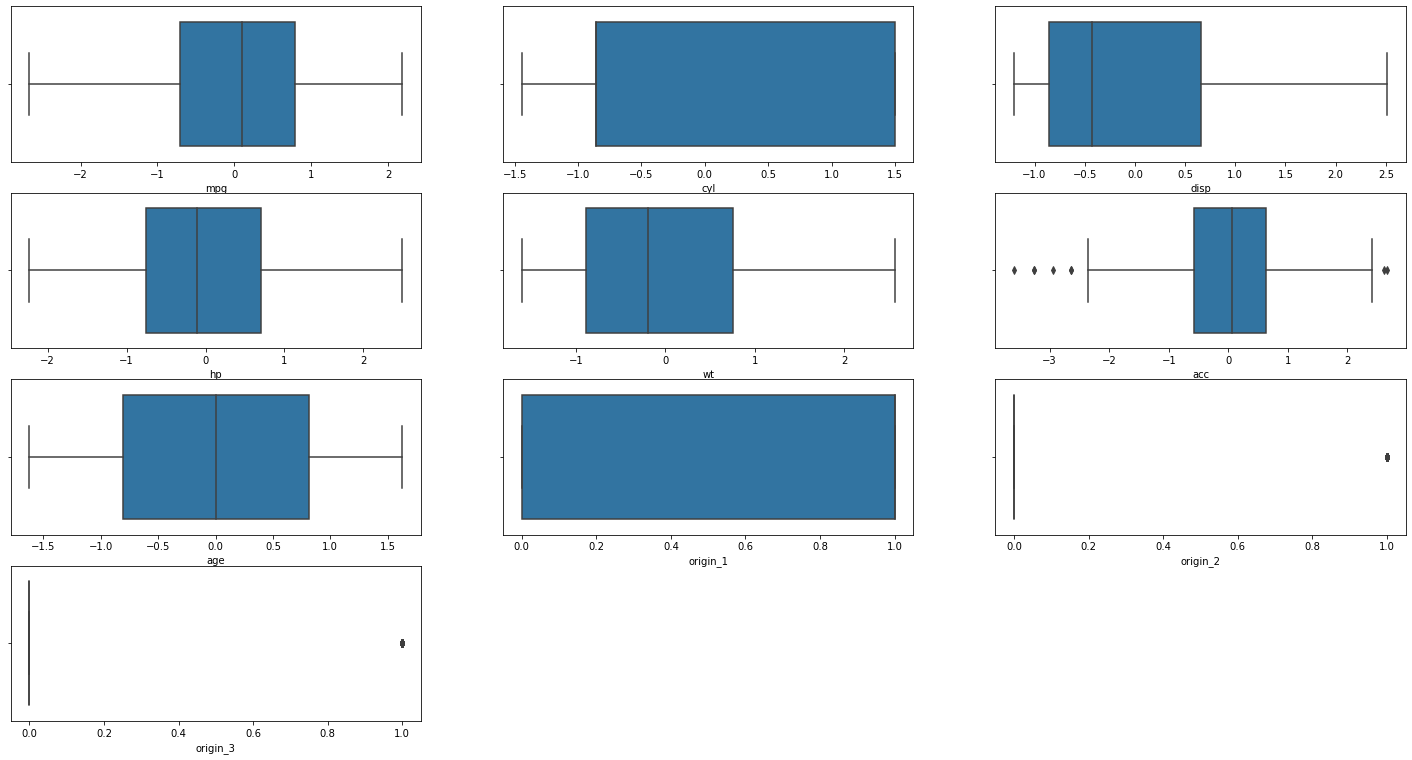

In [84]:
plt.figure(figsize=(25, 20))
col = 1
for i in cars_new:
    plt.subplot(6, 3, col)
    sns.boxplot(cars_new[i])
    col += 1 

<b>3. Clustering: [15 Marks]
    
A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

B. Plot a visual and find elbow point. [2 Marks]

C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]
</b>

<b>Creating Clusters using KMeans</b>

Forming 2 Clusters with K=2

In [85]:
k_means = KMeans(n_clusters = 2)
k_means.fit(cars_new)
k_means.inertia_

1437.6405111621357

In [86]:
# Get the labels
k_means.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,

Forming clusters with K = 3,4,5,6,7,8,9,10 and comparing the WSS

In [87]:
k_means = KMeans(n_clusters = 3)
k_means.fit(cars_new)
k_means.inertia_

1074.5540778495392

In [88]:
k_means = KMeans(n_clusters = 4)
k_means.fit(cars_new)
k_means.inertia_

875.9854316564576

In [89]:
k_means = KMeans(n_clusters = 5)
k_means.fit(cars_new)
k_means.inertia_

788.3543530805828

In [90]:
k_means = KMeans(n_clusters = 6)
k_means.fit(cars_new)
k_means.inertia_

720.2683316554999

In [91]:
k_means = KMeans(n_clusters = 7)
k_means.fit(cars_new)
k_means.inertia_

672.5839474855104

In [92]:
k_means = KMeans(n_clusters = 8)
k_means.fit(cars_new)
k_means.inertia_

629.1837123734254

In [93]:
k_means = KMeans(n_clusters = 9)
k_means.fit(cars_new)
k_means.inertia_

600.3274137777375

In [94]:
k_means = KMeans(n_clusters = 10)
k_means.fit(cars_new)
k_means.inertia_

562.1017985305381

WSS reduces as K keeps increasing

<b>Calculating WSS for other values of K - Elbow Method</b>

In [95]:
wss =[] 

In [96]:
for i in range(2,6):
    KM = KMeans(n_clusters=i)
    KM.fit(cars_new)
    wss.append(KM.inertia_)

cluster_range = range( 2, 6 )   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_new)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

In [97]:
wss

[1437.628071535625, 1074.5540778495392, 875.9854316564576, 788.4830454968678]

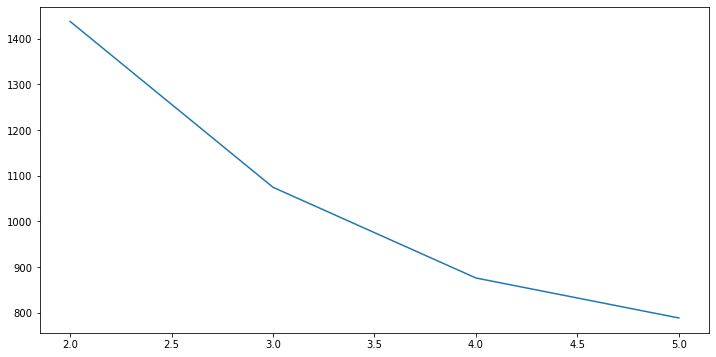

In [98]:
plt.figure(figsize=(12,6))
plt.plot(range(2,6), wss)

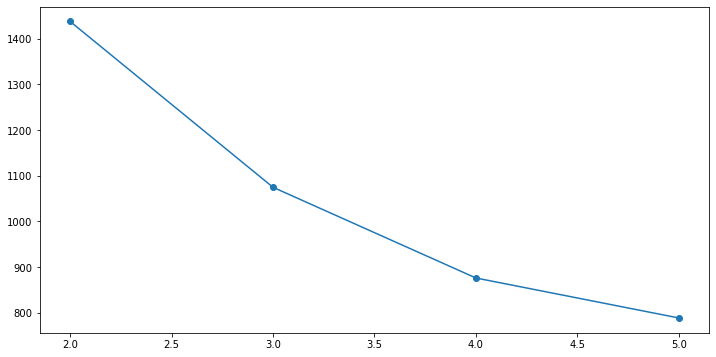

In [99]:
plt.figure(figsize=(12,6))
plt.plot(range(2,6), wss,marker = "o")

In [100]:
# We could see the bend at 4, so let us create 4 custers

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(cars_new)
labels = k_means.labels_




<b>Cluster evaluation for 4 clusters: the silhouette score</b>

In [101]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [102]:
# Calculating silhouette_score
silhouette_score(cars_new,labels)

0.2412550304681808

<b>KMeans with K=5</b>

In [103]:
k_means = KMeans(n_clusters = 5,random_state=0)
k_means.fit(cars_new)
labels = k_means.labels_

In [104]:
# Calculating silhouette_score
silhouette_score(cars_new,labels)

0.3007546418720298

<b>silhouette score is better for 5 clusters than for 4 clusters. So, final clusters will be 5</b>

Appending Clusters to the original dataset

In [105]:
cardata["group"] = labels
cardata.head()

#cardata.drop("car_name",axis=1)

car_name   mpg  cyl   disp   hp    wt   acc  yr  origin  \
0  chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1   
1          buick skylark 320  15.0    8  350.0  165  3693  11.5  70       1   
2         plymouth satellite  18.0    8  318.0  150  3436  11.0  70       1   
3              amc rebel sst  16.0    8  304.0  150  3433  12.0  70       1   
4                ford torino  17.0    8  302.0  140  3449  10.5  70       1   

   age  origin_1  origin_2  origin_3  group  
0   13         1         0         0      1  
1   13         1         0         0      1  
2   13         1         0         0      1  
3   13         1         0         0      1  
4   13         1         0         0      1

<b>Cluster Profiling</b>

In [106]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[117  94  91  96]


In [107]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(cars_new) )
centroid_df.transpose()

0             1         2         3
mpg       1.080530 -1.306300e+00 -0.395798  0.337373
cyl      -0.821104  1.498191e+00  0.424430 -0.868584
disp     -0.773034  1.503923e+00  0.309735 -0.824059
hp       -0.793121  1.437879e+00  0.110979 -0.546505
wt       -0.748370  1.404098e+00  0.324409 -0.770282
acc       0.426220 -1.150226e+00  0.315020  0.308195
age      -1.087358  6.883238e-01 -0.006206  0.657116
origin_1  0.410256  1.000000e+00  0.912088  0.250000
origin_2  0.188034 -2.498002e-16  0.032967  0.468750
origin_3  0.401709  8.326673e-17  0.054945  0.281250

In [108]:
clust_profile=cardata.drop(['car_name'],axis=1)

clust_profile=clust_profile.groupby('group').mean()

clust_profile['freq']=cardata.group.value_counts().sort_index()

clust_profile

mpg       cyl        disp          hp           wt        acc  \
group                                                                        
0      24.974684  3.974684  107.031646   83.379747  2312.329114  16.329114   
1      14.429787  8.000000  350.042553  162.393617  4157.978723  12.576596   
2      34.457746  4.042254   95.971831   66.323944  2123.718310  17.691549   
3      19.079268  6.219512  231.573171  102.207317  3293.743902  16.603659   
4      28.033333  4.277778  136.402778   92.138889  2608.805556  15.365278   

              yr    origin       age  origin_1  origin_2  origin_3  freq  
group                                                                     
0      73.037975  2.012658  9.962025  0.227848  0.531646  0.240506    79  
1      73.468085  1.000000  9.531915  1.000000  0.000000  0.000000    94  
2      79.267606  2.464789  3.732394  0.140845  0.253521  0.605634    71  
3      75.597561  1.085366  7.402439  0.939024  0.036585  0.024390    82  
4      79.847222  1.513889  3.152778  0.694444  0.097222  0.208333    72

array([[<AxesSubplot:title={'center':'acc'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'age'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'cyl'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'disp'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'hp'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'mpg'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_1'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'origin_2'}, xlabel='[group]'>],
       [<AxesSubplot:title={'center':'origin_3'}, xlabel='[group]'>,
        <AxesSubplot:title={'center':'wt'}, xlabel='[group]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

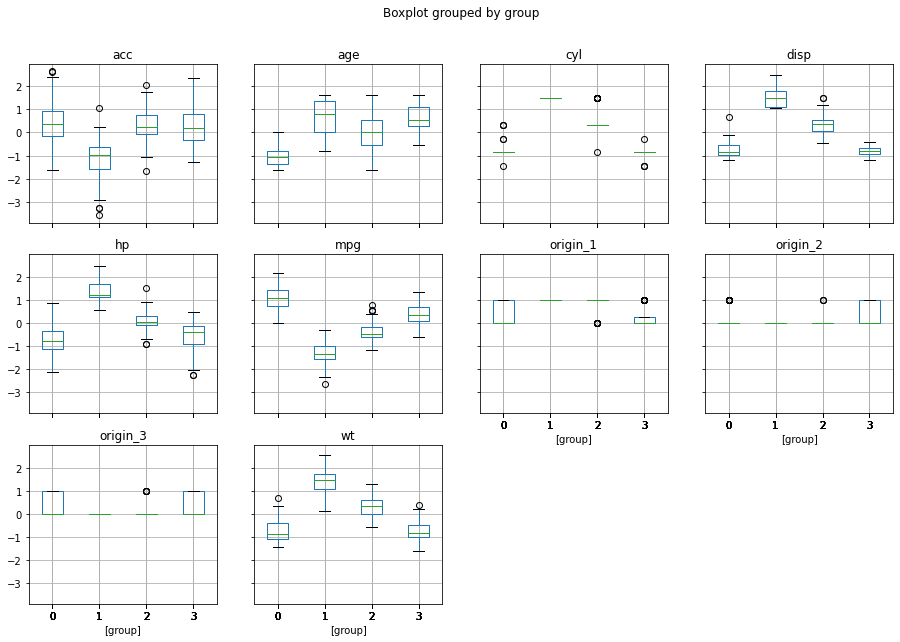

In [109]:
# Visualize the centers
predictions = kmeans.predict(cars_new)

cars_new["group"] = predictions
cars_new.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

<b> Insight for above box plotting

Group 0 is characterised by higher acc, comparitely old models, lower wt, hp but highest mpg with origin at 1

Group 1 -Highest mpg, highest wt and hp. higher age limits. Origin looks more 2

Group 2 - Origin mostly in location 2, highest deviation in wts, and hp so medain mpg and acceleration

Group 3 - Again slighlty lower in wt origin code as 1.</b>

In [110]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

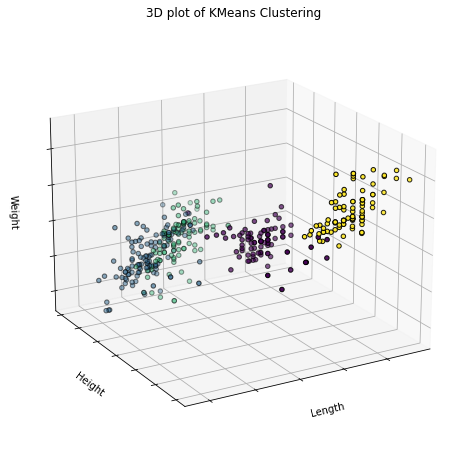

In [111]:
## 3D plots of clusters
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
kmeans.fit(cars_new)
labels = kmeans.labels_
ax.scatter(cars_new.iloc[:, 0], cars_new.iloc[:, 1], cars_new.iloc[:, 3],c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Length')
ax.set_ylabel('Height')
ax.set_zlabel('Weight')
ax.set_title('3D plot of KMeans Clustering')

In [121]:
from scipy import stats
new_data=[27.0,8,312.0,140,3349,9.5,70,1,13,1,0,0,1]
zscores = stats.zscore(new_data)
print(kmeans.fit(cars_new,zscores, sample_weight=None))
print(kmeans.fit_predict(cars_new, zscores, sample_weight=None))


KMeans(n_clusters=4, n_init=5, random_state=12345)
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 0 0 0 2 2 2 2 2 2 0 3 3 3 3 2 2 2 2 0 0 0 0
 0 3 3 3 3 3 3 3 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 3 3
 3 3 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 2 3 3 3 3 0 2 2 2
 2 2 0 2 3 3 2 2 2 2 3 2 0 3 0 0 0 0 2 2 2 2 0 0 0 3 3 3 3 3 2 2 2 2 2 2 2
 2 2 2 2 0 0 0 0 3 3 3 3 0 0 0 0 0 0 3 2 2 0 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2
 2 2 3 3 3 3 0 0 0 0 1 2 2 1 0 0 0 0 2 1 2 2 2 3 2 0 0 3 3 3 3 1 1 1 2 1 3
 0 3 3 0 0 0 0 3 3 3 3 2 2 1 2 1 1 1 2 0 2 2 1 1 1 1 1 0 3 3 0 0 0 1 0 0 0
 0 0 0 3 0 3 3 1 1 1 1 2 0 1 1 2 0 2 0 1 1 0 0 1 0 0 0 3 3 0 3 3 0 3 1 1 1
 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1]


<b><font size=5>Part--B</font></b>

1. Data Understanding & Cleaning: [5 Marks]

A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

B. Check percentage of missing values and impute with correct approach. [1 Marks]

C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [122]:
#importing all the required libraries:EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#importing all the required libraries:Machine Learning & PCA

from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support, mean_absolute_errorx_t
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.svm import SVC

#importing all the required libraries:GridSearchCV

from sklearn.model_selection import GridSearchCV

In [123]:
#loading the dataset
Data=pd.read_csv('vehicle.csv')
Data.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [124]:
#coping the orinal dataset
df=Data

In [125]:
#Shape of Dataset
rows, column = df.shape
print('The dataset contains', rows, 'rows and', column, 'columns.')

The dataset contains 846 rows and 19 columns.


In [126]:
#datatypes of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [127]:
#Checking for number of missing values for every column
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [128]:
#We will replace the missing values with the median values of that particular column.
for cols in df.columns:
    if(cols != 'class'): 
        df[cols] = df[cols].fillna(df[cols].median())

In [129]:
df.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

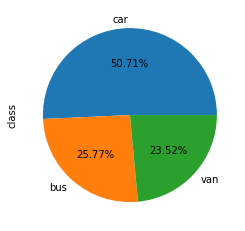

In [130]:
def visualise(filename):
    for cname in filename.columns:
        if(filename[cname].nunique() < 6):
            filename[cname].value_counts().plot(kind='pie',autopct='%.2f%%')
            plt.show()
visualise(df)

50.71% is covered with car.

25.77% is covered with bus.

23.52% is covered with van.

In [131]:
#Check for duplicated values, if any
df[df.duplicated()].shape[0]

0

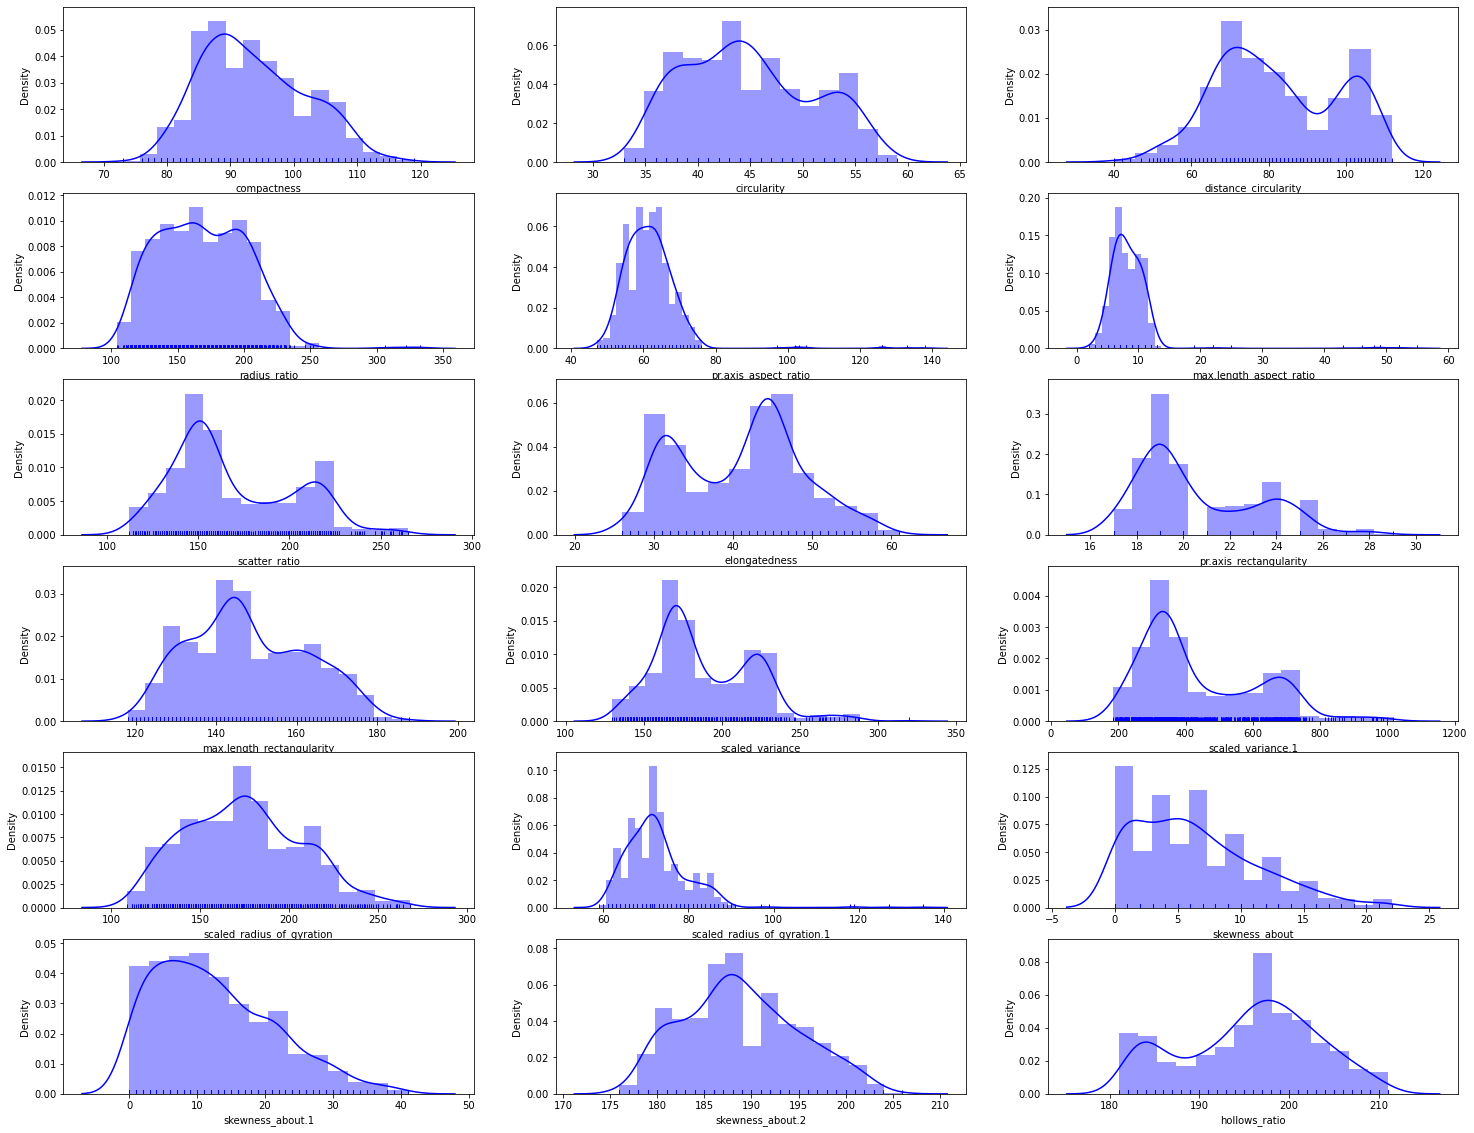

In [132]:
#Distribution plot for independent variables
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.distplot(df[i], color = 'b', rug = True)
    col += 1 

Statistical Inference

Columns have data distributed across multiple scales.

Several columns have distributions that are not unimodal (eg.: distance_circularity, hollows_ratio, elongatedness Column skweness_about, skewness_about.1 have data that is right skewed whereas for column skewness_about.2 data is nearly normally distributed.

Some columns have long right tail (eg.: pr.axis_aspect_ratio) as evident from the above distplot it is highly likely that they will have outliers.

<b>Boxplots- to check for outliers</b>

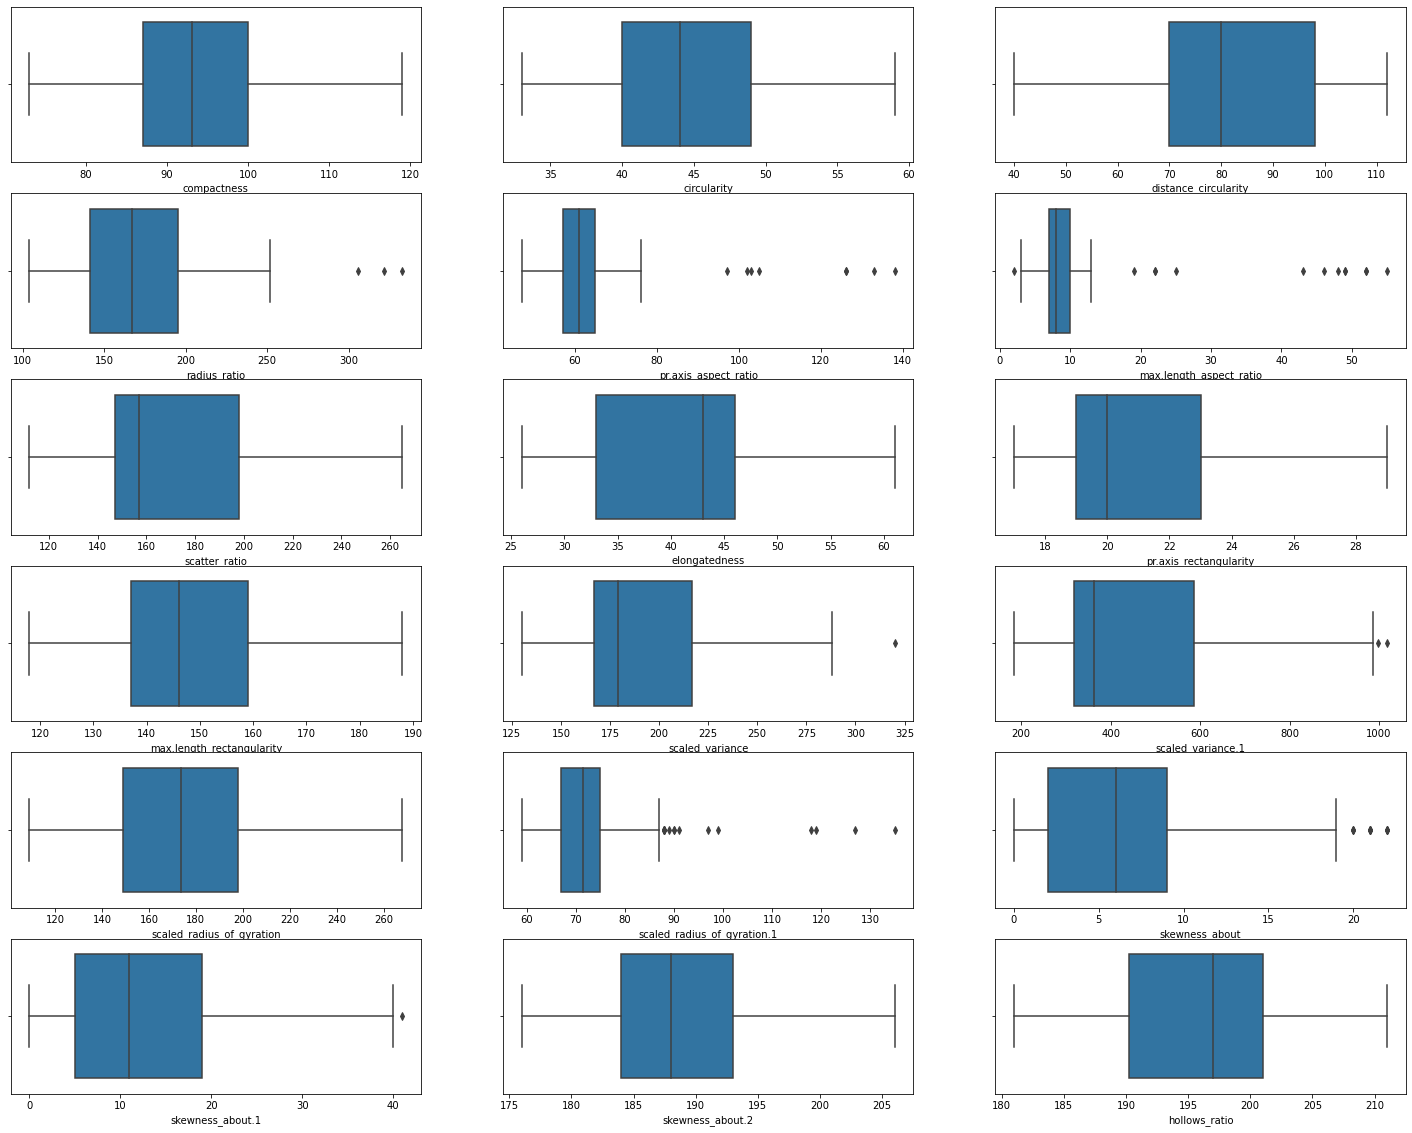

In [133]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.boxplot(df[i])
    col += 1 

Outliers

Above Boxplots reveal that there are outliers in 7 different columns.

Outlier Treatment

In [134]:
#find the outliers and replace them by median
for col_name in df.drop(columns = 'class').columns:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    df.loc[(df[col_name] < low) | (df[col_name] > high), col_name] = df[col_name].median()

boxplot after outlier treatment

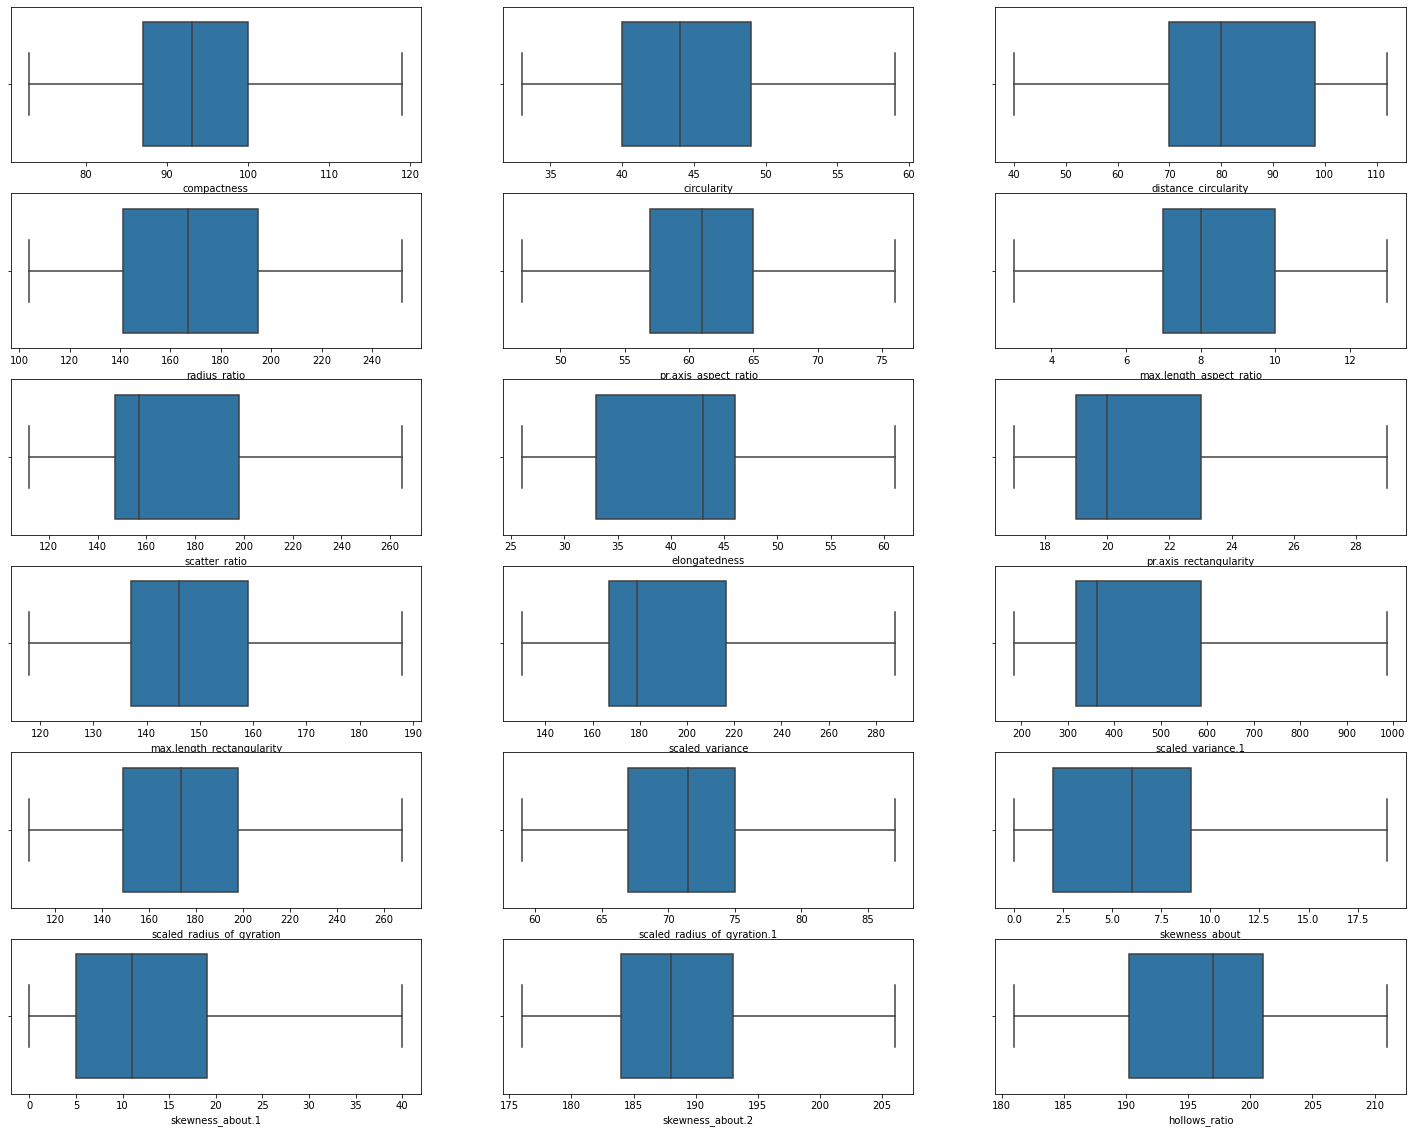

In [135]:
plt.figure(figsize=(25, 20))
col = 1
for i in df.drop(columns = 'class').columns:
    plt.subplot(6, 3, col)
    sns.boxplot(df[i])
    col += 1 

<b>2. Data Preparation: [2 Marks]

A. Split data into X and Y. [Train and Test optional] [1 Marks]

B. Standardize the Data. [1 Marks]

Splitting the dependent and independent variables. The dependent variable (y) is further transformed into an encoded categorical column.</b>

In [136]:
X = df.loc[:, df.columns != 'class']
y = df['class'].astype('category').cat.codes

Text(0.5, 1.0, 'Correlation with Class column')

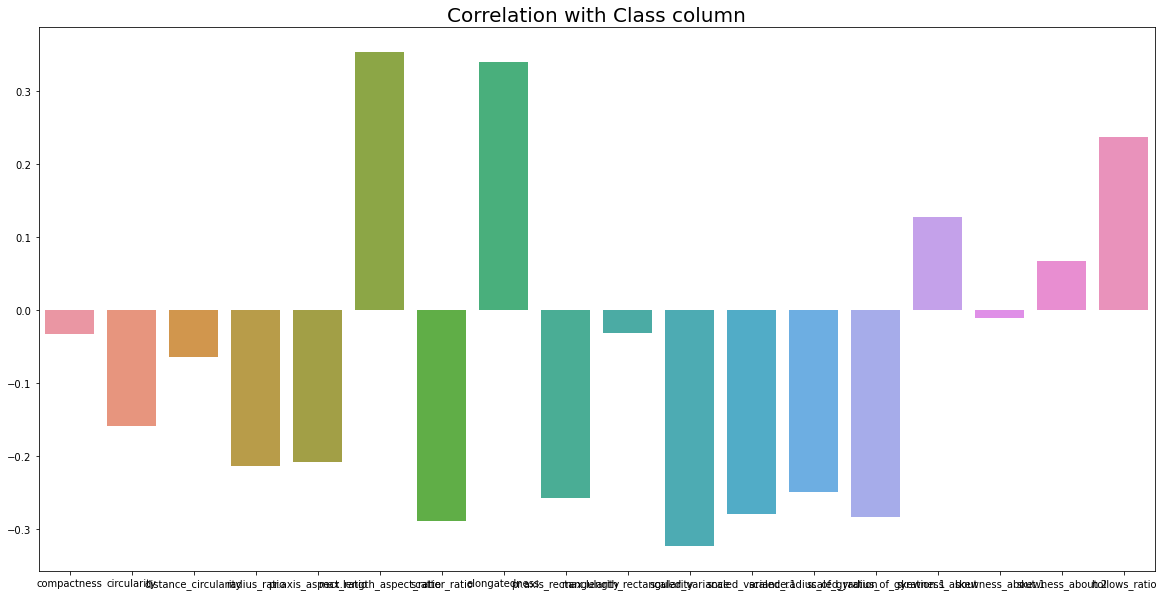

In [137]:
plt.figure(figsize = (20, 10))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)

In [138]:

from sklearn.preprocessing import StandardScaler


X_col = X.columns
scaler = RobustScaler()
X_std = pd.DataFrame(scaler.fit_transform(X))
X_std.columns = X_col #the column names are passed to the standardized dataframe
X_std.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.153846     0.444444              0.107143      0.204651   
1    -0.153846    -0.333333              0.142857     -0.483721   
2     0.846154     0.666667              0.928571      0.781395   
3     0.000000    -0.333333              0.071429     -0.148837   
4    -0.615385     0.000000             -0.357143      0.706977   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                 1.375                 0.666667       0.098039   
1                -0.500                 0.333333      -0.156863   
2                 0.625                 0.666667       0.980392   
3                 0.250                 0.333333      -0.254902   
4                 0.000                 0.000000      -0.156863   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.076923                    0.00                   0.590909   
1       0.153846                   -0.25                  -0.136364   
2      -0.846154                    0.75                   0.545455   
3       0.230769                   -0.25                  -0.136364   
4       0.153846                   -0.25                  -0.090909   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0        -0.060302           0.057890                   0.214286   
1        -0.180905          -0.125117                  -0.316327   
2         0.884422           1.014006                   0.948980   
3        -0.381910          -0.203548                  -0.948980   
4         1.246231          -0.143791                   0.295918   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.1875        0.000000          0.357143   
1                       0.0625        0.428571          0.214286   
2                       0.1875        1.142857         -0.142857   
3                      -1.0625        0.000000         -0.071429   
4                       0.0000        0.428571          0.000000   

   skewness_about.2  hollows_ratio  
0         -0.111111       0.000000  
1          0.111111       0.186047  
2          0.000000      -0.093023  
3          1.222222       0.930233  
4         -0.888889      -1.302326

In [139]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

<b>3. Model Building: [13 Marks]

A. Train a base Classification model using SVM. [1 Marks]

B. Print Classification metrics for train data. [1 Marks]

C. Apply PCA on the data with 10 components. [3 Marks]

D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

G. Train SVM model on components selected from above step. [1 Marks]

H. Print Classification metrics for train data of above model and share insights. [2 Marks]</b>

In [140]:
print('SVC Model of dataset without PCA')
svc_model = SVC(kernel = 'linear', gamma = 'scale', C = 1)
# fitting the model
svc_model.fit(X_train, y_train)

# predict the response
y_predictSVC = svc_model.predict(X_test)

modeltrSVC_score = svc_model.score(X_train, y_train)
print('\nAccuracy Score of Training Data: ', modeltrSVC_score)

cfm_SVC = confusion_matrix(y_test, y_predictSVC)



SVC Model of dataset without PCA

Accuracy Score of Training Data:  0.9425675675675675



Accuracy Score of Test Data: 0.9448818897637795

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.94      0.94      0.94        71
           1       0.97      0.93      0.95       125
           2       0.90      0.98      0.94        58

    accuracy                           0.94       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.94      0.94       254


Mean Absolute Error of SVC:
 0.05905511811023622

Confusion Matrix of SVC:
 [[ 67   3   1]
 [  4 116   5]
 [  0   1  57]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC Model')

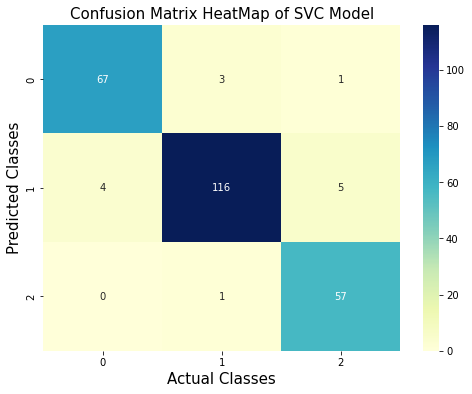

In [141]:
# evaluate accuracy
modelSVC_score = accuracy_score(y_test, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score)
print('\nClassification Report of SVC Model:\n ', classification_report(y_test, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_test, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Model', fontsize = 15)

In [142]:
precision_SVC, recall_SVC, f1_score_SVC, support = precision_recall_fscore_support(y_test, y_predictSVC, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC)
print('Recall Score :', '%0.2f' % recall_SVC)
print('F1-Score :', '%0.2f' % f1_score_SVC)
print('Accuracy Score :','%0.2f' % modelSVC_score)

Precision Score : 0.94
Recall Score : 0.95
F1-Score : 0.94
Accuracy Score : 0.94


<b>Applying PCA on 10 Components</b>

In [143]:
from sklearn.decomposition import PCA
pca_18 = PCA(n_components = 18)

pca_18.fit(X_std)

PCA(n_components=18)

In [144]:
#Eigen values
print(pca_18.explained_variance_)

[3.96100935e+00 1.65870806e+00 5.13125294e-01 4.94835514e-01
 3.94116009e-01 2.96614528e-01 1.39542157e-01 9.65854893e-02
 6.14513508e-02 3.54768843e-02 2.88836973e-02 2.31031113e-02
 1.73160148e-02 1.31973434e-02 1.21370214e-02 9.51277726e-03
 8.47124019e-03 2.15456314e-03]


In [145]:
#Eigen vectors
print(pca_18.components_)

[[ 2.70447593e-01  3.08703426e-01  2.65942302e-01  2.52585109e-01
   1.09214594e-01  2.13874526e-01  3.15596351e-01 -2.89988322e-01
   3.10540787e-01  2.89929102e-01  2.91291670e-01  3.10633904e-01
   2.75022976e-01 -5.33629155e-02  3.81838626e-02  5.63034801e-02
   4.22027355e-02  9.45420647e-02]
 [-7.47916800e-02  1.26651078e-01 -3.48093808e-02 -1.62272484e-01
  -2.48978101e-01 -1.08750428e-01  7.36512380e-02 -1.53458109e-02
   8.42168152e-02  1.13034088e-01  7.29964089e-02  7.02249862e-02
   1.97981239e-01  5.56982050e-01 -1.57637616e-02 -7.55602532e-02
  -4.86108063e-01 -4.99531014e-01]
 [-1.18830485e-01 -5.87844882e-02 -6.00864271e-02  2.49637579e-01
   6.08795859e-01 -3.65061020e-01  4.64038791e-02 -9.41521128e-02
   2.21250572e-02 -1.41319498e-01  1.17492762e-01  5.55858661e-02
  -7.03700592e-03  1.66474566e-01 -5.67582188e-01 -5.73388419e-02
   2.12686548e-02 -1.02793570e-01]
 [ 4.27060563e-02 -2.04641952e-01  9.83827980e-02 -4.18919783e-02
  -3.57611140e-01 -1.78522101e-02  1.

In [146]:
#Variance ratio
print(pca_18.explained_variance_ratio_)

[5.10029196e-01 2.13579284e-01 6.60712607e-02 6.37162241e-02
 5.07473357e-02 3.81928080e-02 1.79677874e-02 1.24365825e-02
 7.91262536e-03 4.56808990e-03 3.71913510e-03 2.97481279e-03
 2.22965218e-03 1.69932203e-03 1.56279239e-03 1.22488833e-03
 1.09077749e-03 2.77426790e-04]


Text(0.5, 0, 'Principal Components')

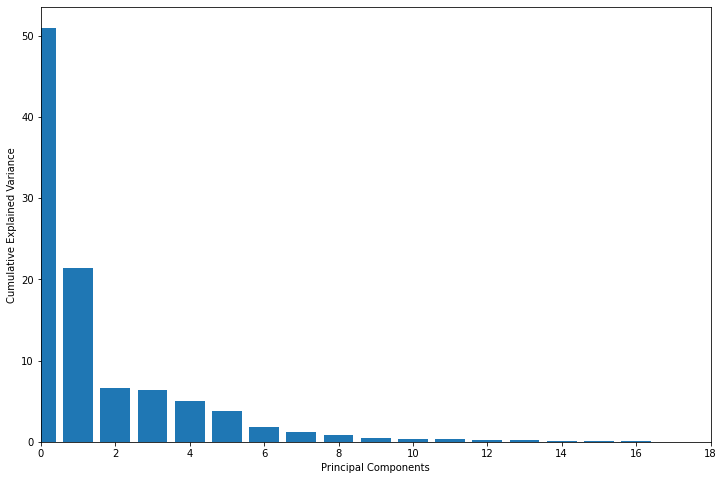

In [147]:
## PCA visualization how information is captured across components
percent_variance = np.round(pca_18.explained_variance_ratio_* 100, decimals = 2)

plt.figure(figsize = (12, 8))
plt.bar(x = list(range(18)), height = percent_variance)
plt.xlim(0, 18)
plt.ylabel('Cumulative Explained Variance')
plt.xlabel('Principal Components')

Text(0.5, 1.0, 'Vehicle Dataset Explained Variance')

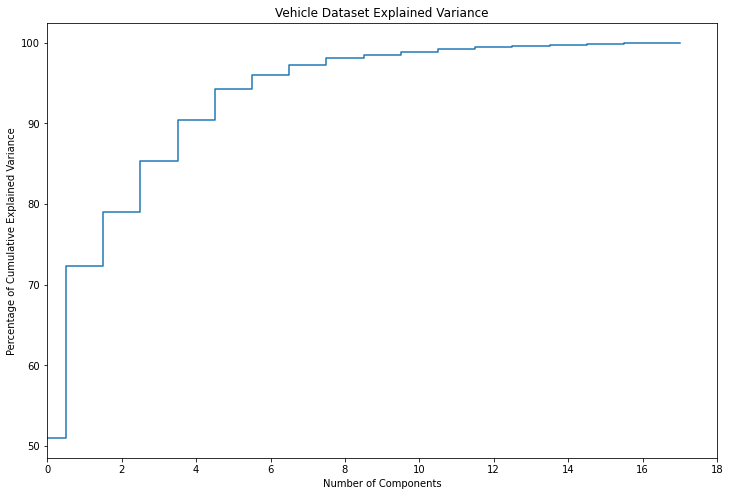

In [148]:
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca_18.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance')

Findings after applying PCA on the dataset

We can see that the first seven components explain more than 95% of variation.

Between first five components, more than 91% of the information is captured.

The above plot shows almost 95% variance by the first 7 components.

In [149]:
pca_10 = PCA(n_components = 10)

X_pca = pca_10.fit_transform(X_std)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 10


In [150]:
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

0         1         2         3         4         5         6  \
0  0.446376 -0.475441  0.415578 -0.591180 -0.628784 -1.166228 -0.141708   
1 -0.969205 -0.247348 -0.860688  0.132533 -0.118024 -0.153620  0.121625   
2  2.471311  0.202940 -0.292011 -0.761633  0.598456 -0.485311  0.517424   
3 -0.945422 -2.161404 -0.350315 -0.148290 -0.333014  0.219506  0.096389   
4 -0.440204  1.005528  0.217450 -0.347911  0.147644 -0.579934  0.214694   

          7         8         9  
0 -0.343759  0.334776  0.120027  
1 -0.028565 -0.251388 -0.186859  
2  0.137581  0.059605 -0.341580  
3 -0.207973 -0.212381  0.259560  
4  1.081624  0.766720 -0.282094

In [151]:
#Transform the raw data with 18 dim into 10 dims
X_std_pca_10 = pca_10.transform(X_std)
X_std_pca_10.shape

(846, 10)

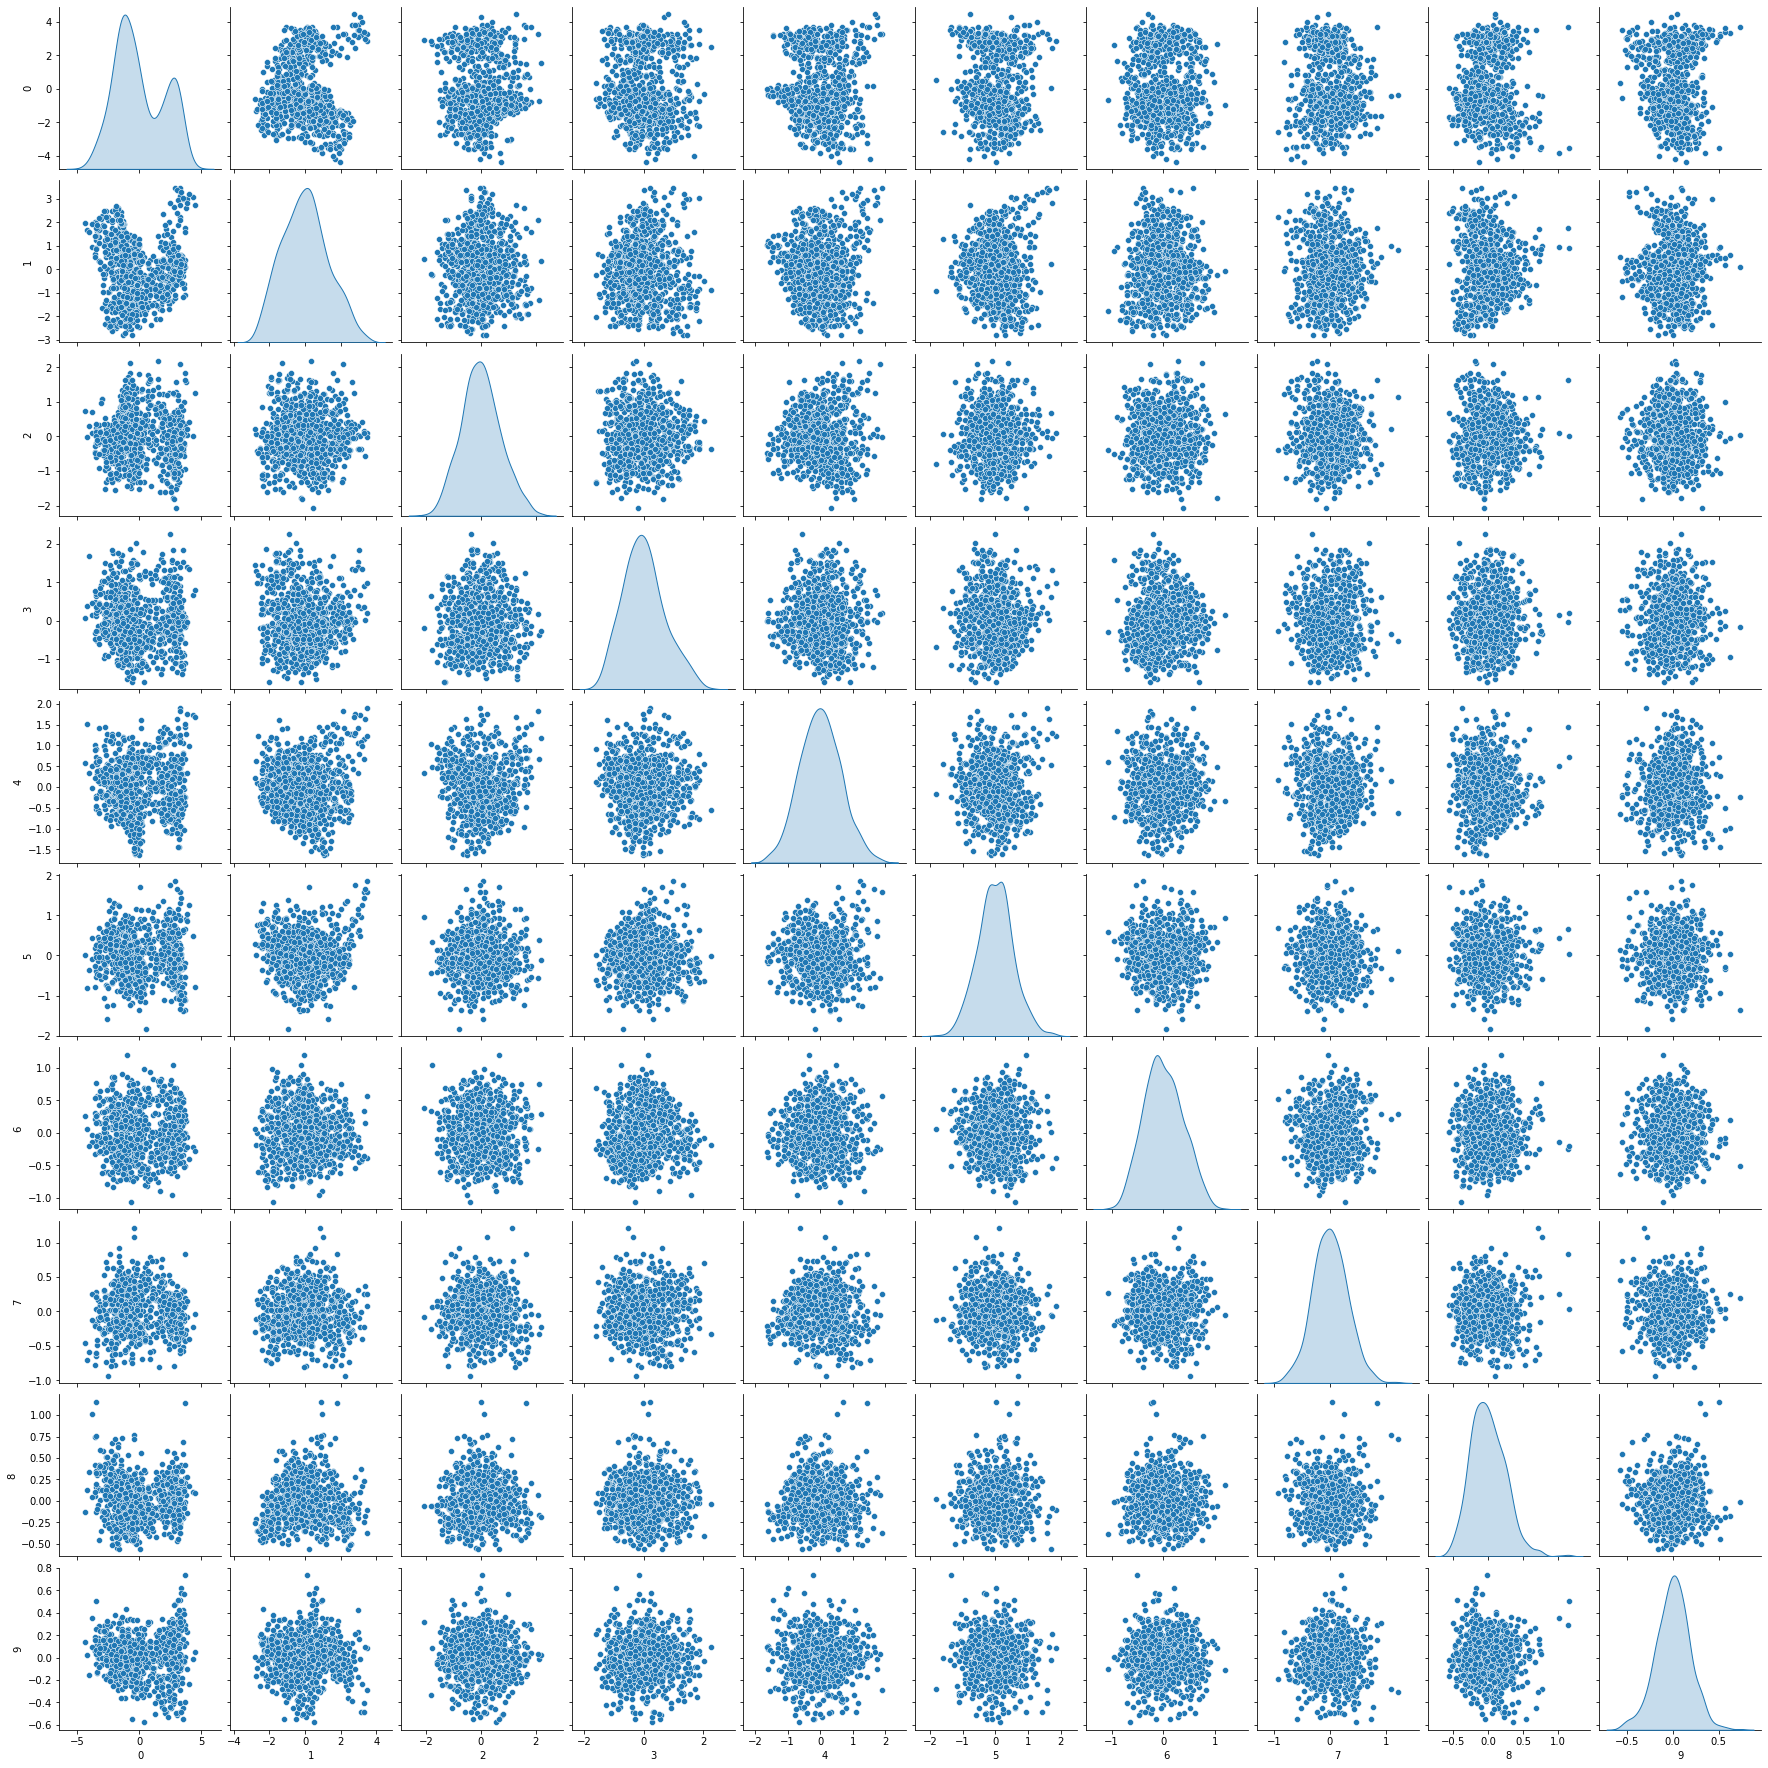

In [152]:
#Draw pairplot to find correlation
sns.pairplot(pd.DataFrame(X_std_pca_10),diag_kind='kde')

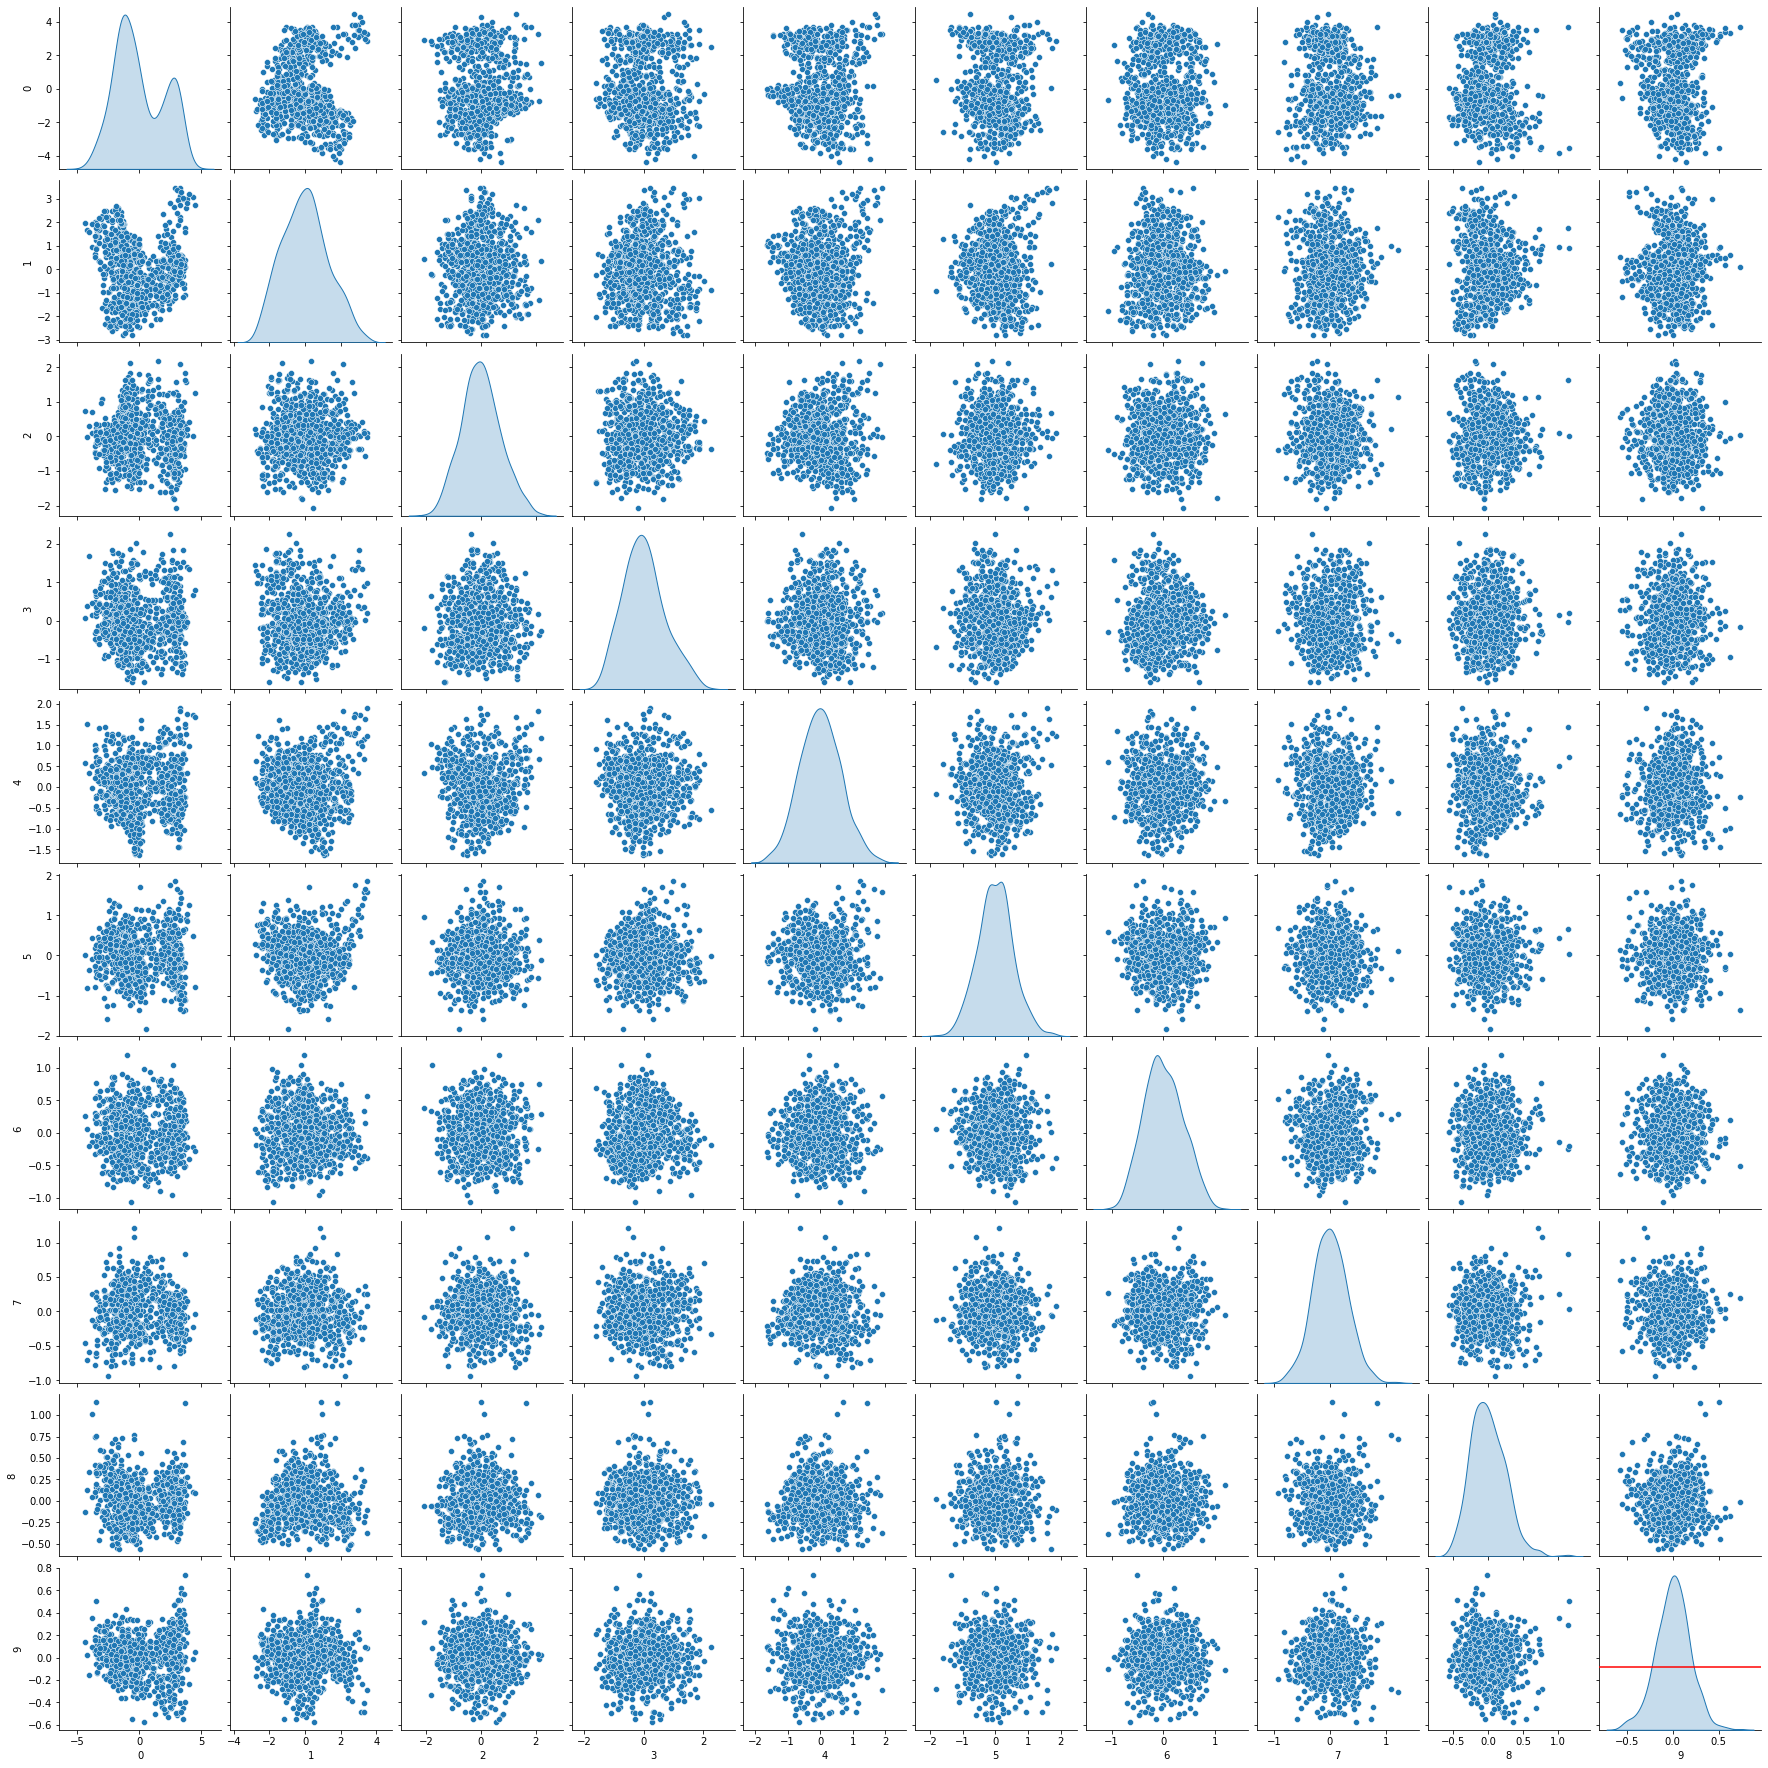

In [153]:
sns.pairplot(pd.DataFrame(X_std_pca_10),diag_kind='kde')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.show()

From the above explained variance plot the first 5 components,more than 91% of the information is captured. so we can drop from 6th component.

In [154]:
pca_5 = PCA(n_components = 5)

X_pca = pca_5.fit_transform(X_std)

print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 18
Reduced number of features: 5


In [155]:
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

0         1         2         3         4
0  0.446376 -0.475441  0.415578 -0.591180 -0.628784
1 -0.969205 -0.247348 -0.860688  0.132533 -0.118024
2  2.471311  0.202940 -0.292011 -0.761633  0.598456
3 -0.945422 -2.161404 -0.350315 -0.148290 -0.333014
4 -0.440204  1.005528  0.217450 -0.347911  0.147644

In [156]:
#Transform the raw data with 18 dim into 10 dims
X_std_pca_5 = pca_5.transform(X_std)
X_std_pca_5.shape

(846, 5)

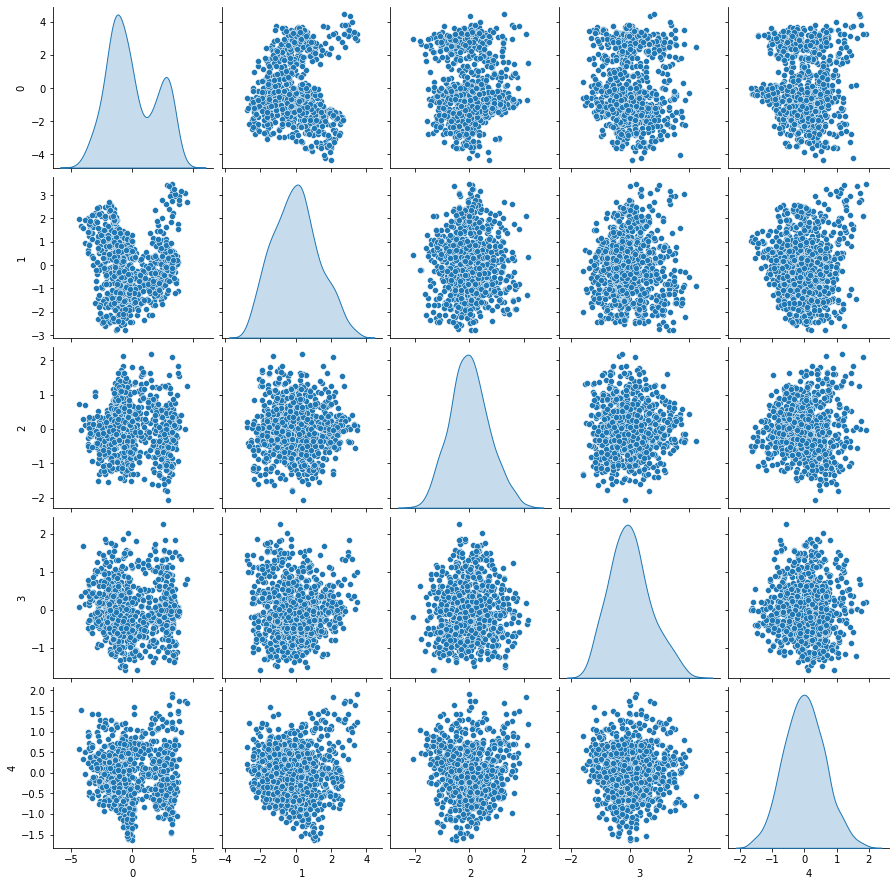

In [157]:
#Draw pairplot to find correlation
sns.pairplot(pd.DataFrame(X_std_pca_5),diag_kind='kde')

In [158]:
X_tr_pca_5, X_te_pca_5, y_tr_pca_5, y_te_pca_5 = train_test_split(X_std_pca_5, y, test_size = 0.3, random_state = 10)

In [159]:
rtr_pca_5, ctr_pca_5 = X_tr_pca_5.shape
print('The PCA training set comprises of', rtr_pca_5, 'rows and', ctr_pca_5, 'columns.')

The PCA training set comprises of 592 rows and 5 columns.


In [160]:
rt_pca_5, ct_pca_5 = X_te_pca_5.shape
print('The PCA test set comprises of', rt_pca_5, 'rows and', ct_pca_5, 'columns.')

The PCA test set comprises of 254 rows and 5 columns.


In [161]:
svc_model = SVC(kernel = 'linear', gamma = 'scale', C = 1)
# fitting the model
svc_model.fit(X_tr_pca_5, y_tr_pca_5)

# predict the response
y_predictSVC = svc_model.predict(X_te_pca_5)

modeltrSVC_score = svc_model.score(X_tr_pca_5, y_tr_pca_5)
print('\nAccuracy Score of Training Data: ', modeltrSVC_score)

cfm_SVC = confusion_matrix(y_test, y_predictSVC)



Accuracy Score of Training Data:  0.8226351351351351



Accuracy Score of Test Data: 0.7992125984251969

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.77      0.82      0.79        71
           1       0.88      0.76      0.82       125
           2       0.70      0.86      0.78        58

    accuracy                           0.80       254
   macro avg       0.79      0.81      0.80       254
weighted avg       0.81      0.80      0.80       254


Mean Absolute Error of SVC:
 0.23228346456692914

Confusion Matrix of SVC:
 [[58  9  4]
 [13 95 17]
 [ 4  4 50]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC Model')

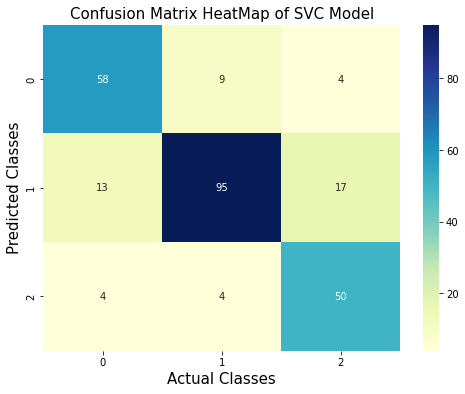

In [162]:
# evaluate accuracy
modelSVC_score = accuracy_score(y_te_pca_5, y_predictSVC)
print('\nAccuracy Score of Test Data:', modelSVC_score)
print('\nClassification Report of SVC Model:\n ', classification_report(y_te_pca_5, y_predictSVC))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te_pca_5, y_predictSVC))
print('\nConfusion Matrix of SVC:\n', cfm_SVC)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Model', fontsize = 15)

<b>Splitting the data into training (70%) and testing set (30%).</b>

Original Dataset

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.3, random_state = 10)

In [164]:
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')

The training set comprises of 592 rows and 18 columns.


In [165]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')

The test set comprises of 254 rows and 18 columns.


PCA reduced Dataset

In [166]:
X_tr, X_te, y_tr, y_te = train_test_split(X_std_pca_10, y, test_size = 0.3, random_state = 10)

In [167]:
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

The PCA training set comprises of 592 rows and 10 columns.


In [168]:
rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

The PCA test set comprises of 254 rows and 10 columns.


<b>4. Performance Improvement: [5 Marks]

A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

B. Share best Parameters observed from above step. [1 Marks]

C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]</b>

SVC Model of dataset with PCA

Accuracy Score of Training Data:  0.8918918918918919

Accuracy Score of Test Data: 0.905511811023622

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.86      0.94      0.90        71
           1       0.95      0.88      0.91       125
           2       0.88      0.91      0.90        58

    accuracy                           0.91       254
   macro avg       0.90      0.91      0.90       254
weighted avg       0.91      0.91      0.91       254


Mean Absolute Error of SVC:
 0.1062992125984252

Confusion Matrix of SVC:
 [[ 67   4   0]
 [  8 110   7]
 [  3   2  53]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC with PCA Model')

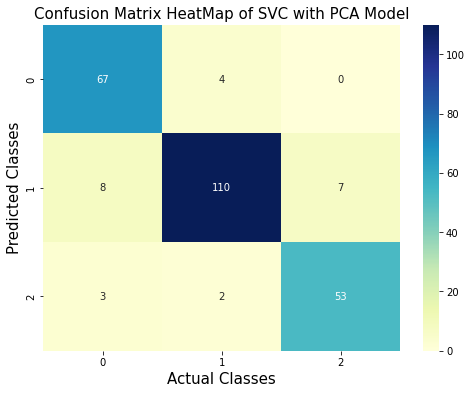

In [169]:
svc_model = SVC(kernel = 'linear', gamma = 'scale', C = 1)

print('SVC Model of dataset with PCA')
# fitting the model
svc_model.fit(X_tr, y_tr)

# predict the response
y_predictSVC_pca = svc_model.predict(X_te)

modeltrSVC_pca_score = svc_model.score(X_tr, y_tr)
print('\nAccuracy Score of Training Data: ', modeltrSVC_pca_score)
modelSVC_pca_score = accuracy_score(y_te, y_predictSVC_pca)
print('\nAccuracy Score of Test Data:', modelSVC_pca_score)

cfm_SVC_pca = confusion_matrix(y_te, y_predictSVC_pca)


print('\nClassification Report of SVC Model:\n ', classification_report(y_te, y_predictSVC_pca))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te, y_predictSVC_pca))
print('\nConfusion Matrix of SVC:\n', cfm_SVC_pca)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_pca, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC with PCA Model', fontsize = 15)

In [170]:
precision_SVC_pca, recall_SVC_pca, f1_score_SVC_pca, support = precision_recall_fscore_support(y_te, y_predictSVC_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_pca)
print('Recall Score :', '%0.2f' % recall_SVC_pca)
print('F1-Score :', '%0.2f' % f1_score_SVC_pca)
print('Accuracy Score :','%0.2f' % modelSVC_pca_score)

Precision Score : 0.90
Recall Score : 0.91
F1-Score : 0.90
Accuracy Score : 0.91


In [171]:
param_grid_pca = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]


# Make grid search classifier
clf_grid_pca = GridSearchCV(SVC(), param_grid_pca, verbose = 1)
 
# Train the classifier
clf_grid_pca.fit(X_tr, y_tr)
 

print('\n\nBest Parameters:\n', clf_grid_pca.best_params_)
print('\n\nBest Estimators:\n', clf_grid_pca.best_estimator_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


Best Parameters:
 {'C': 1, 'kernel': 'rbf'}


Best Estimators:
 SVC(C=1)


According to Grid Search, the RBF model of SVC with C (regularization parameter) as 1

Use the SVC parameter as suggested by Grid Search


Accuracy Score of Training Data:  0.956081081081081

Accuracy Score of Test Data: 0.9645669291338582

Classification Report of SVC Model:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.97      0.97      0.97       125
           2       0.93      0.93      0.93        58

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254


Mean Absolute Error of SVC:
 0.03937007874015748

Confusion Matrix of SVC:
 [[ 70   1   0]
 [  0 121   4]
 [  1   3  54]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC with PCA Model')

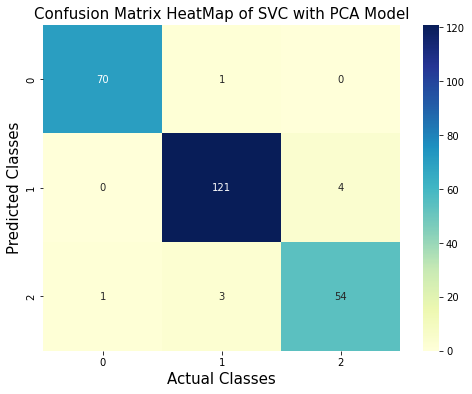

In [172]:
svc_cv_pca_model = SVC(kernel = 'rbf', gamma = 'scale', C = 1)


# fitting the model
svc_cv_pca_model.fit(X_tr, y_tr)

# predict the response
y_predictSVC_cv_pca = svc_cv_pca_model.predict(X_te)

modeltrSVC_cv_pca_score = svc_cv_pca_model.score(X_tr, y_tr)
print('\nAccuracy Score of Training Data: ', modeltrSVC_cv_pca_score)
modelSVC_cv_pca_score = accuracy_score(y_te, y_predictSVC_cv_pca)
print('\nAccuracy Score of Test Data:', modelSVC_cv_pca_score)

cfm_SVC_cv_pca = confusion_matrix(y_te, y_predictSVC_cv_pca)


print('\nClassification Report of SVC Model:\n ', classification_report(y_te, y_predictSVC_cv_pca))
print('\nMean Absolute Error of SVC:\n', mean_absolute_error(y_te, y_predictSVC_cv_pca))
print('\nConfusion Matrix of SVC:\n', cfm_SVC_cv_pca)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_cv_pca, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC with PCA Model', fontsize = 15)

In [173]:
precision_SVC_cv_pca, recall_SVC_cv_pca, f1_score_SVC_cv_pca, support = precision_recall_fscore_support(y_te, y_predictSVC_cv_pca, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_cv_pca)
print('Recall Score :', '%0.2f' % recall_SVC_cv_pca)
print('F1-Score :', '%0.2f' % f1_score_SVC_cv_pca)
print('Accuracy Score :','%0.2f' % modelSVC_cv_pca_score)

Precision Score : 0.96
Recall Score : 0.96
F1-Score : 0.96
Accuracy Score : 0.96


Grid Search with original dataset

Accuracy Score of Training Data:  0.9662162162162162

Accuracy Score of Test Data: 0.9606299212598425

Classification Report of SVC Linear Model:
                precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.93      0.92        58

    accuracy                           0.96       254
   macro avg       0.95      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254


Mean Absolute Error of SVC Linear:
 0.047244094488188976

Confusion Matrix of SVC Linear:
 [[ 70   0   1]
 [  0 120   5]
 [  1   3  54]]


Text(0.5, 1.0, 'Confusion Matrix HeatMap of SVC Grid Search Model')

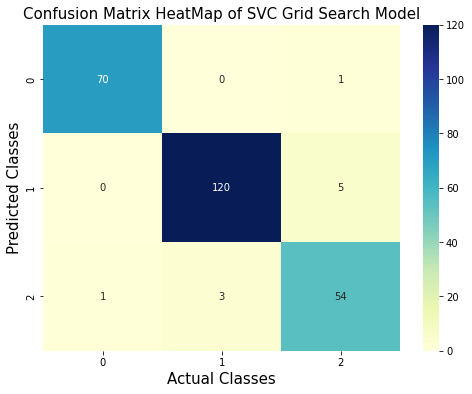

In [174]:
svc_cv_model = SVC(kernel = 'rbf', gamma = 'scale', C = 1)

# fitting the model
svc_cv_model.fit(X_train, y_train)

# predict the response
y_predictSVC_cv = svc_cv_model.predict(X_test)

modeltrSVC_cv_score = svc_cv_model.score(X_train, y_train)
print('Accuracy Score of Training Data: ', modeltrSVC_cv_score)

cfm_SVC_cv = confusion_matrix(y_test, y_predictSVC_cv)


# evaluate accuracy
modelSVC_score_cv = accuracy_score(y_test, y_predictSVC_cv)
print('\nAccuracy Score of Test Data:', modelSVC_score_cv)
print('\nClassification Report of SVC Linear Model:\n ', classification_report(y_test, y_predictSVC_cv))
print('\nMean Absolute Error of SVC Linear:\n', mean_absolute_error(y_test, y_predictSVC_cv))
print('\nConfusion Matrix of SVC Linear:\n', cfm_SVC_cv)

#visualization of confusion matrix in the form of a heatmap
plt.figure(figsize = (8, 6))
sns.heatmap(cfm_SVC_cv, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix HeatMap of SVC Grid Search Model', fontsize = 15)

In [175]:
precision_SVC_cv, recall_SVC_cv, f1_score_SVC_cv, support = precision_recall_fscore_support(y_test, y_predictSVC_cv, average = 'macro')
print('Precision Score :', '%0.2f' % precision_SVC_cv)
print('Recall Score :', '%0.2f' % recall_SVC_cv)
print('F1-Score :', '%0.2f' % f1_score_SVC_cv)
print('Accuracy Score :','%0.2f' % modelSVC_score_cv)

Precision Score : 0.95
Recall Score : 0.96
F1-Score : 0.96
Accuracy Score : 0.96


Dataframe of GridSearch suggested models

In [176]:
modellsts = []

modellsts.append(['Support Vector Classifier with PCA using Grid Search', modeltrSVC_cv_pca_score * 100, modelSVC_cv_pca_score * 100, recall_SVC_cv_pca * 100, precision_SVC_cv_pca * 100])
modellsts.append(['Support Vector Classifier using Grid Search', modeltrSVC_cv_score * 100, modelSVC_score_cv * 100, recall_SVC_cv * 100, precision_SVC_cv * 100])

md_df = pd.DataFrame(modellsts, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
md_df

Model  \
0  Support Vector Classifier with PCA using Grid ...   
1        Support Vector Classifier using Grid Search   

   Accuracy Score of Training Data  Accuracy Score of Test Data  Recall Score  \
0                        95.608108                    96.456693     96.164999   
1                        96.621622                    96.062992     95.898333   

   Precision Score  
0        96.164999  
1        95.384175

<b><font size=4>Consodilated dataframe of all models</font></b>

In [177]:
modellists = []
modellists.append(['Support Vector Classifier with PCA', modeltrSVC_pca_score * 100, modelSVC_pca_score * 100, recall_SVC_pca * 100, precision_SVC_pca * 100])
modellists.append(['Support Vector Classifier with PCA using Grid Search', modeltrSVC_cv_pca_score * 100, modelSVC_cv_pca_score * 100, recall_SVC_cv_pca * 100, precision_SVC_cv_pca * 100])
modellists.append(['Support Vector Classifier using Grid Search', modeltrSVC_cv_score * 100, modelSVC_score_cv * 100, recall_SVC_cv * 100, precision_SVC_cv * 100])
modellists.append(['Support Vector Classifier without PCA', modeltrSVC_score * 100, modelSVC_score * 100, recall_SVC * 100, precision_SVC * 100])
model_df = pd.DataFrame(modellists, columns = ['Model', 'Accuracy Score of Training Data', 'Accuracy Score of Test Data', 'Recall Score', 'Precision Score'])
model_df

Model  \
0                 Support Vector Classifier with PCA   
1  Support Vector Classifier with PCA using Grid ...   
2        Support Vector Classifier using Grid Search   
3              Support Vector Classifier without PCA   

   Accuracy Score of Training Data  Accuracy Score of Test Data  Recall Score  \
0                        89.189189                    90.551181     91.248503   
1                        95.608108                    96.456693     96.164999   
2                        96.621622                    96.062992     95.898333   
3                        82.263514                    79.921260     95.147353   

   Precision Score  
0        89.686118  
1        96.164999  
2        95.384175  
3        93.836351

Text(0.5, 1.0, 'Comparison of Classification Models')

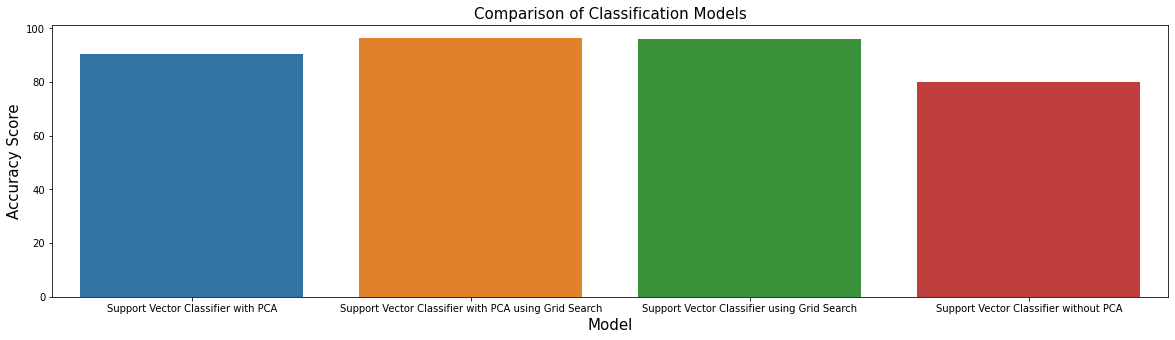

In [178]:
plt.figure(figsize = (20, 5))
sns.barplot(x = model_df['Model'], y = model_df['Accuracy Score of Test Data'], data = model_df)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy Score', fontsize = 15)
plt.title('Comparison of Classification Models', fontsize = 15)

When we use the hyperparameters suggested by Grid Search:

The accuracy score of the PCA dataset increases by 5.9%.

The accuracy score of the original dataset increases by 16.14%.

<b>5. Data Understanding & Cleaning: [5 Marks]

A. Explain pre-requisite/assumptions of PCA. [2 Marks]

B. Explain advantages and limitations of PCA. [3 Marks]</b>



<b>Assumptions of PCA

Independent variables are highly correlated to each other.

Variables included are metric level or nominal level.

Features are low dimensional in nature.

Independent variables are numeric in nature.

Bartlett-Test: The Bartlett test is statistically significant as.

H0: Variables are uncorrelated.

H1: Variables are correlated.
    </b>

<b>Advantages of PCA</b>

-Removes the correlated attributes.

-Help to reduce overfitting.

-Improves the data visualization.

-It also help to improve the performance of Algorithm
    
<b>LIMITATIONS</b>

-Data normalization must be needed before applyingPCA

-Some level of information loss.

-Independent variables are becoming less interpretable.

    
